# Preparing plots for article

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore') #aesthetic reasons, comment of while developing.


def get_sterror(data,subgroup):
    try:
        return data.loc[subgroup,:].std(numeric_only=True)/np.sqrt(len(data.loc[subgroup,:]))
    except:
        return data[subgroup].std(numeric_only=True)/np.sqrt(len(data[subgroup]))
    
#Loading data

# result = pd.read_excel('database.xlsx')
result = pd.read_csv('database_subjectiver.csv')

#Filtering groups and changing to English names of groups
group1 = result['Condition_x_first']=='Reskrypcja'
group2 = result['Condition_x_first']=='Ekspozycja'
group3 = result['Condition_x_first']=='Reskrypcja10'
group4 = result['Condition_x_first']=='CFT'
group_12 = group1 | group2
result['Condition_x_first'] = result['Condition_x_first'].replace({'Reskrypcja10':'Rescripting 10',
                                                                   'Reskrypcja':'Rescripting',
                                                                   'Ekspozycja':'Exposure'})

# Plotting results for each time point


<Figure size 2000x3000 with 0 Axes>

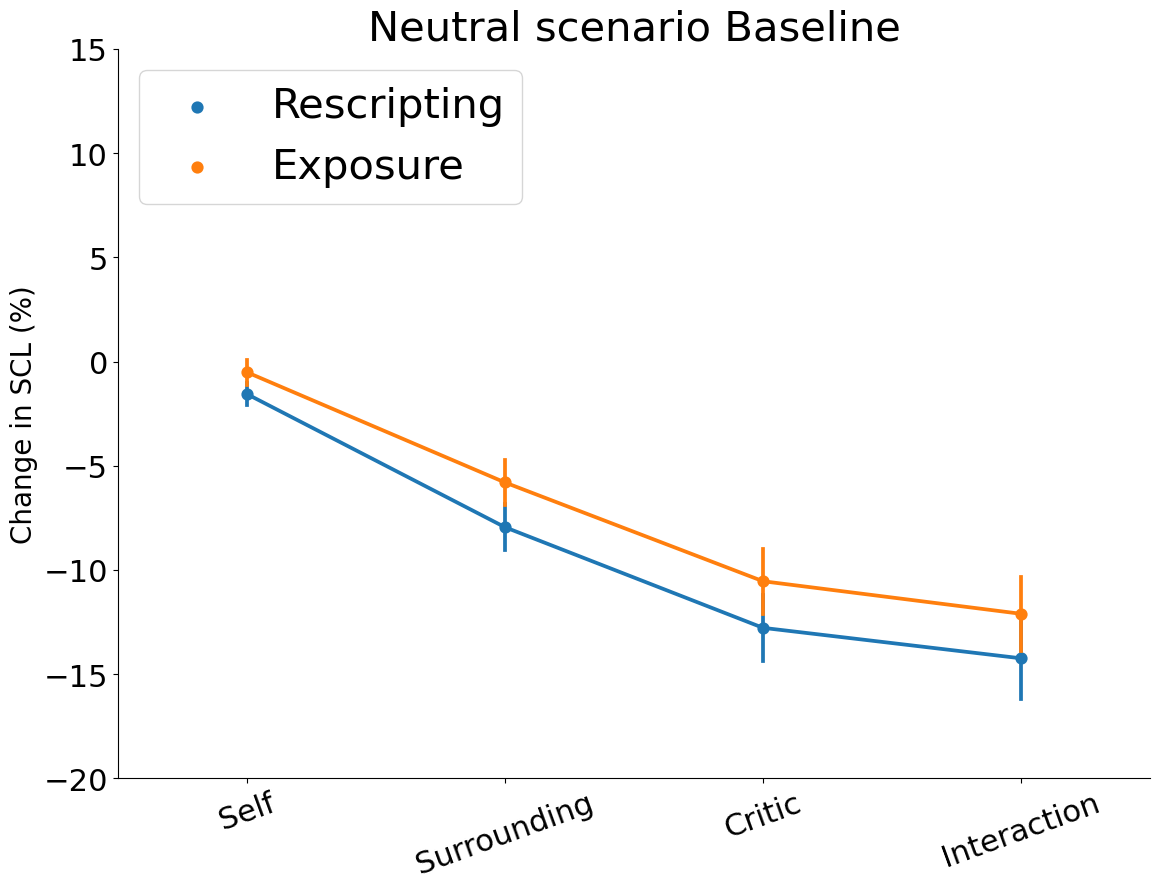

<Figure size 2000x3000 with 0 Axes>

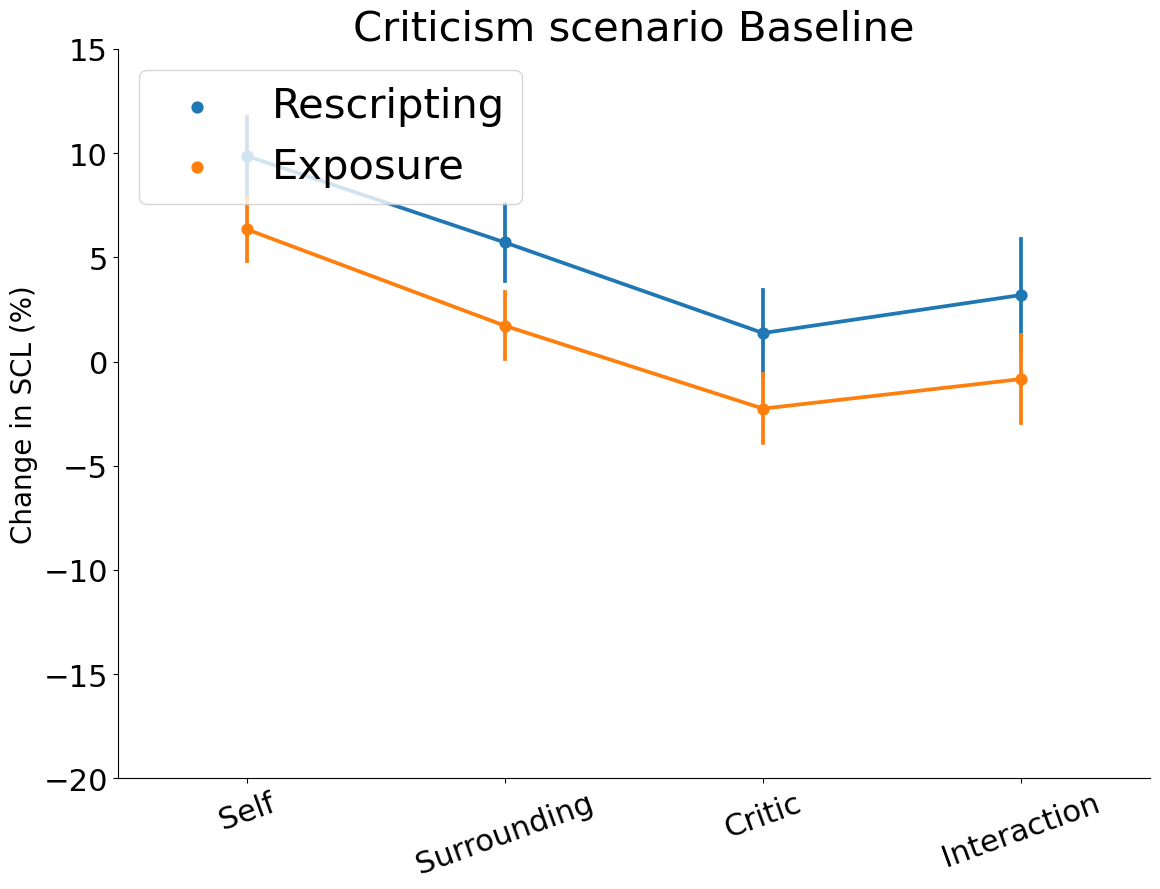

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

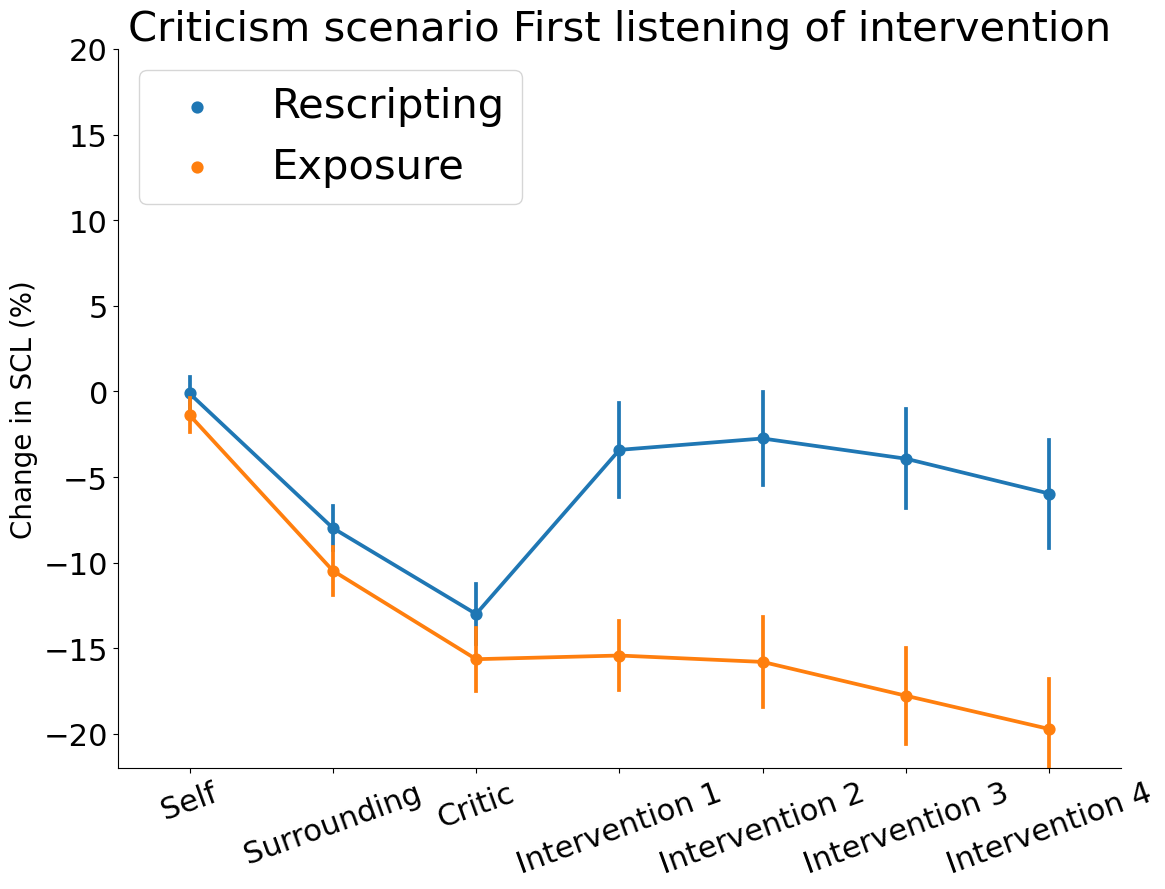

<Figure size 2000x3000 with 0 Axes>

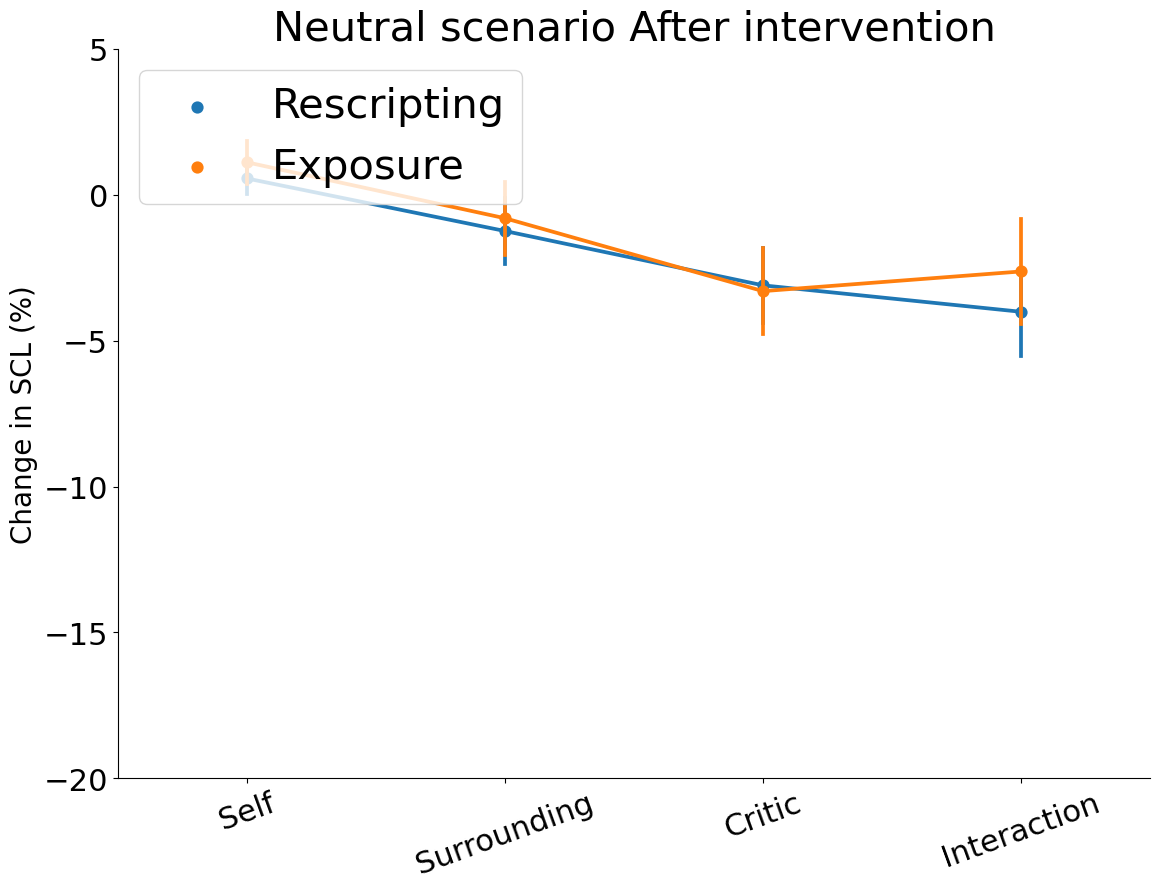

<Figure size 2000x3000 with 0 Axes>

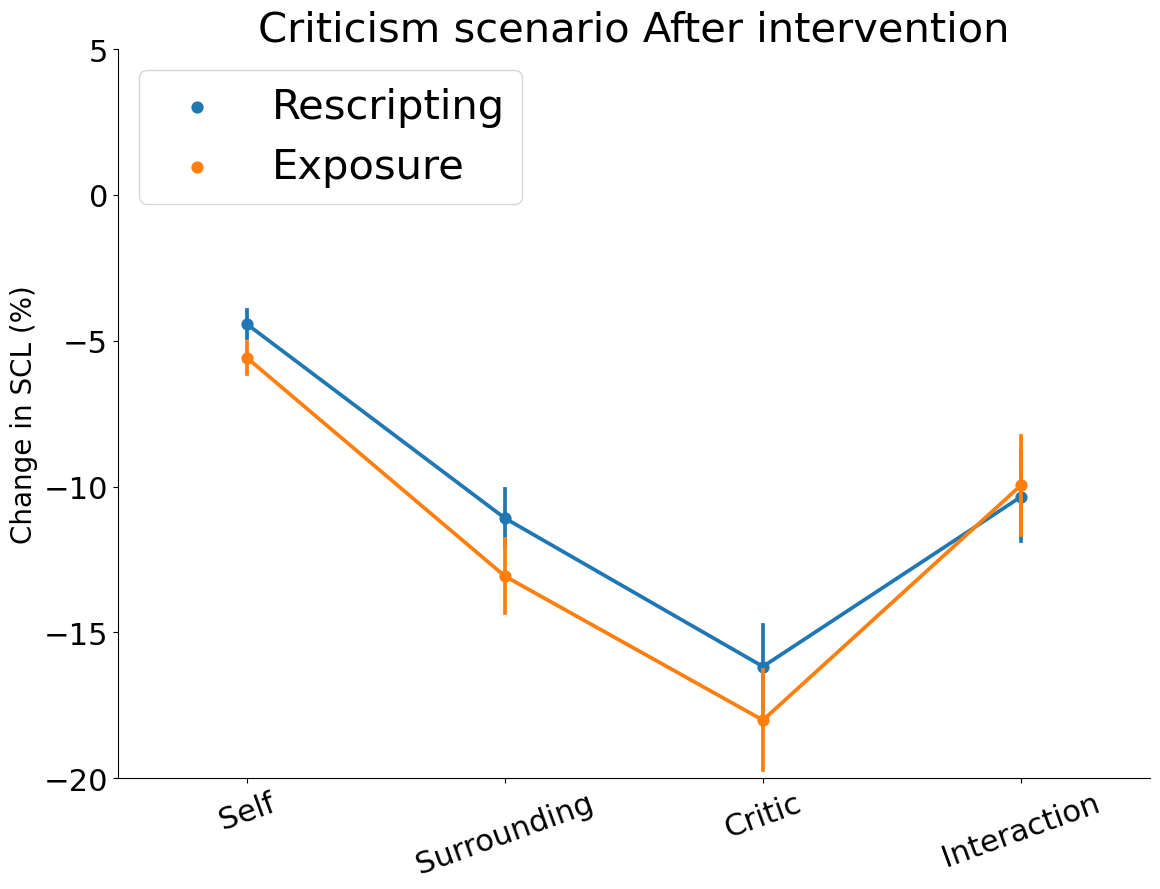

<Figure size 2000x3000 with 0 Axes>

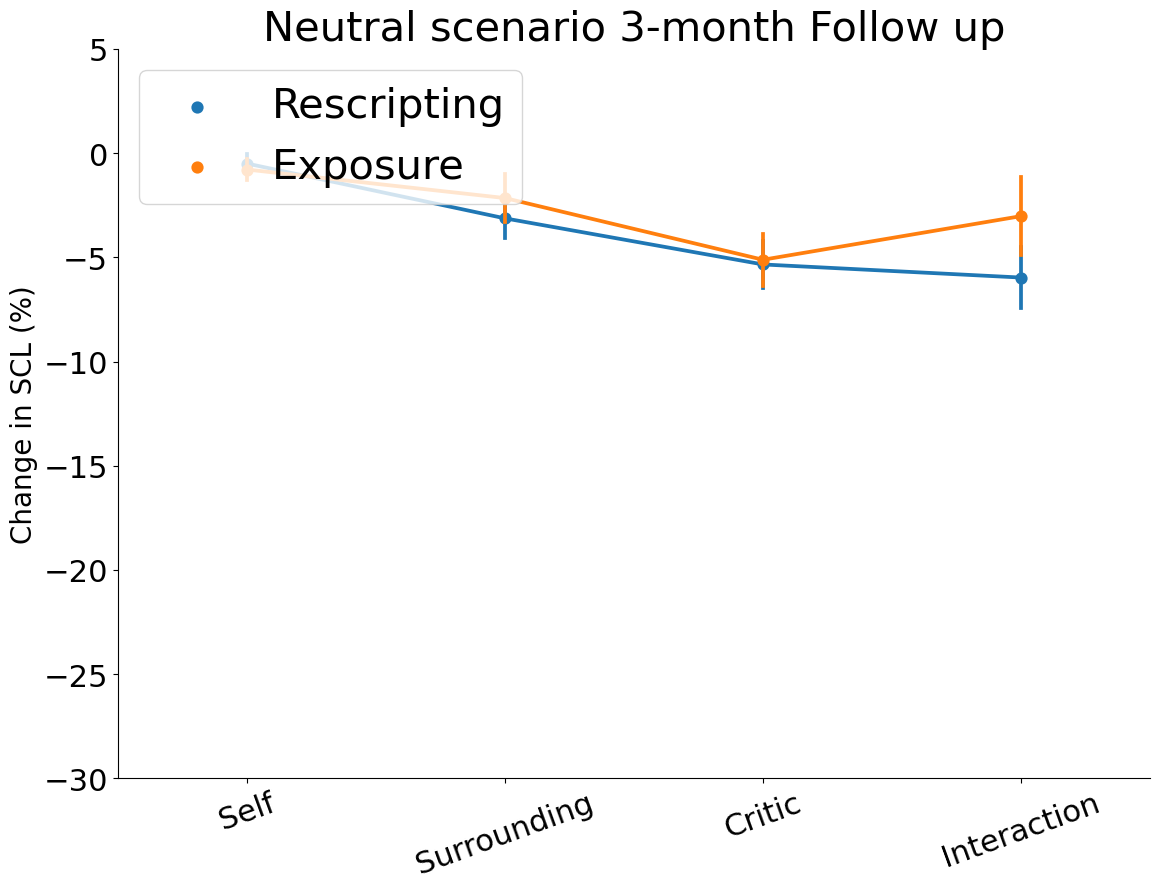

<Figure size 2000x3000 with 0 Axes>

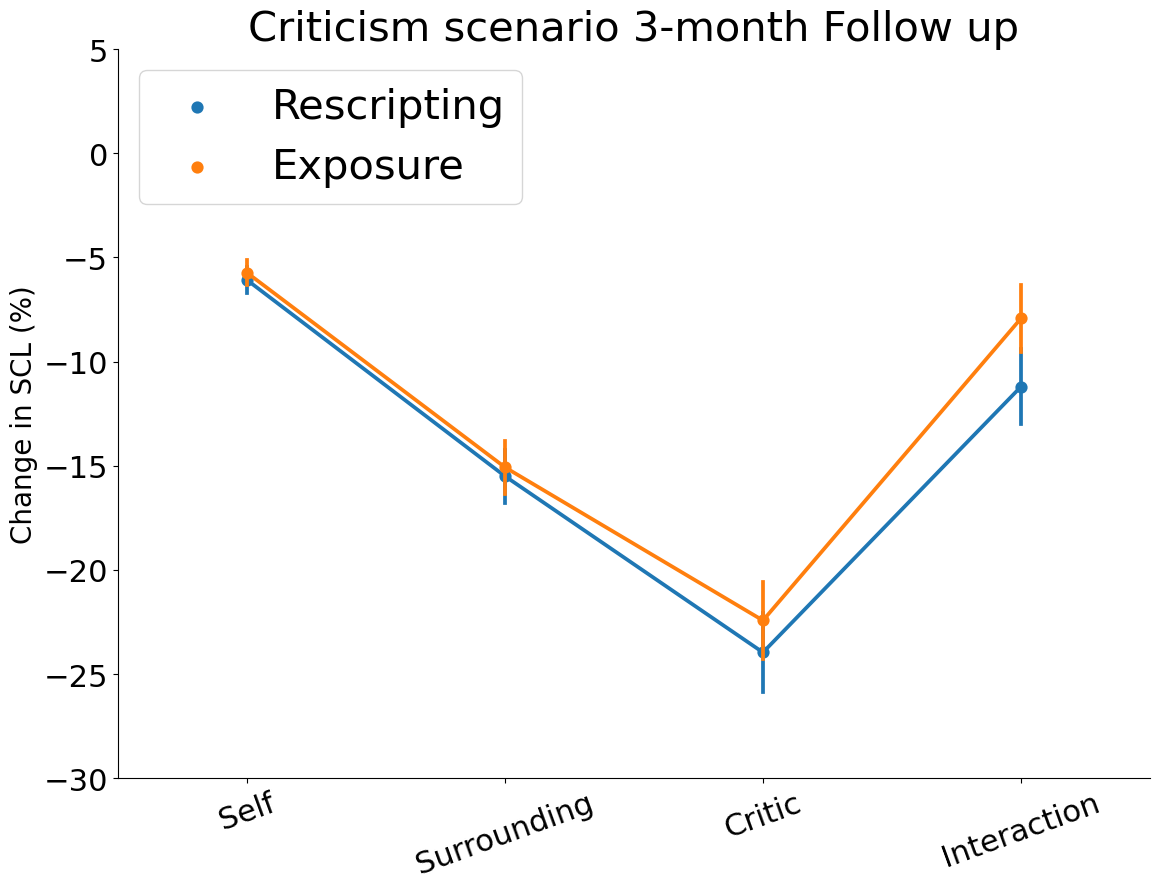

<Figure size 2000x3000 with 0 Axes>

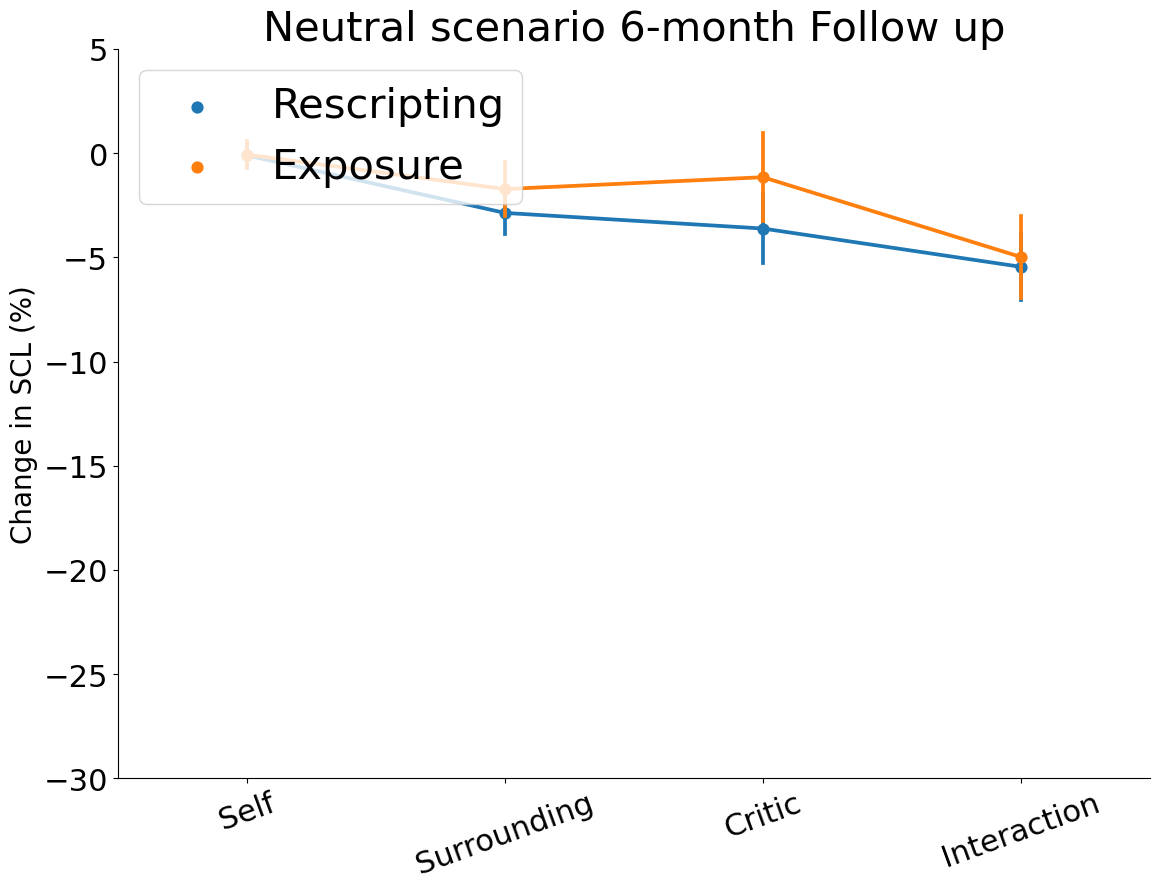

<Figure size 2000x3000 with 0 Axes>

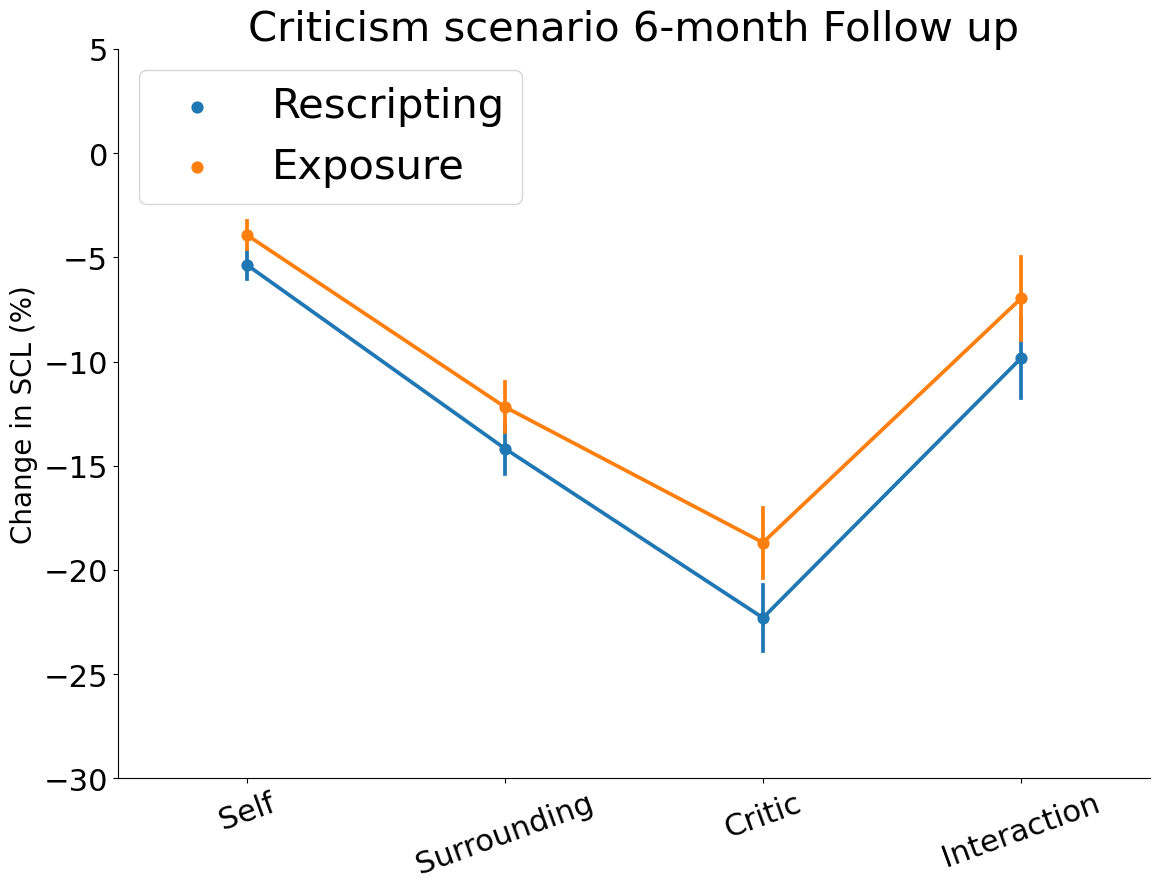

In [44]:
time_point = {'TP1':['Baseline',[-20,15]],
              'TP2':['First listening of intervention',[-22,20]],
              'TP63':['After intervention',[-20,5]],
             'TP73':['3-month Follow up',[-30,5]],
             'TP83':['6-month Follow up',[-30,5]]}
scenario = {'Neut':'Neutral scenario','CritT':'Criticism scenario'}

colset_dict = {'TP1':['Self','Surrounding','Critic','Interaction'],
              'TP2':['Self','Surrounding','Critic','Intervention 1', 'Intervention 2','Intervention 3','Intervention 4'],
              'TP63':['Self','Surrounding','Critic','Interaction'],
              'TP73':['Self','Surrounding','Critic','Interaction'],
              'TP83':['Self','Surrounding','Critic','Interaction']}

tp = 'TP73'
cond = 'Neut'

for tpoint in list(time_point.keys()):
    for scen in list(scenario.keys()):
        try:
            tp = tpoint
            tp_formal = time_point[tp][0]
            scen_formal = scenario[scen]
            cond = scen
            group = group_12
            title = f'{scen_formal} {tp_formal}'
            ylab = 'Change in SCL (%)'

            plt.figure(figsize=(20,30))
            

            tmp = result.loc[group,result.columns.str.contains(fr'SCL_{tp}_{cond}_P.*')]
            tmp.columns = colset_dict[tpoint]
            tmp['Condition'] = result['Condition_x_first']
            tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
            sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='se'
                        ,height=9, aspect=1.3,legend=False)


            plt.xlabel('',fontsize=20)
            plt.ylabel(ylab,fontsize=20)
            plt.xticks(fontsize=22,rotation=20)
            plt.yticks(fontsize=22)
            plt.title(title,fontsize=30)

            plt.ylim(time_point[tp][1])
            plt.legend(loc='upper left',fontsize=30)

            plt.tight_layout()
            plt.savefig(f'{scen_formal} {tp_formal}.png')
        except:
            pass
plt.show()

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

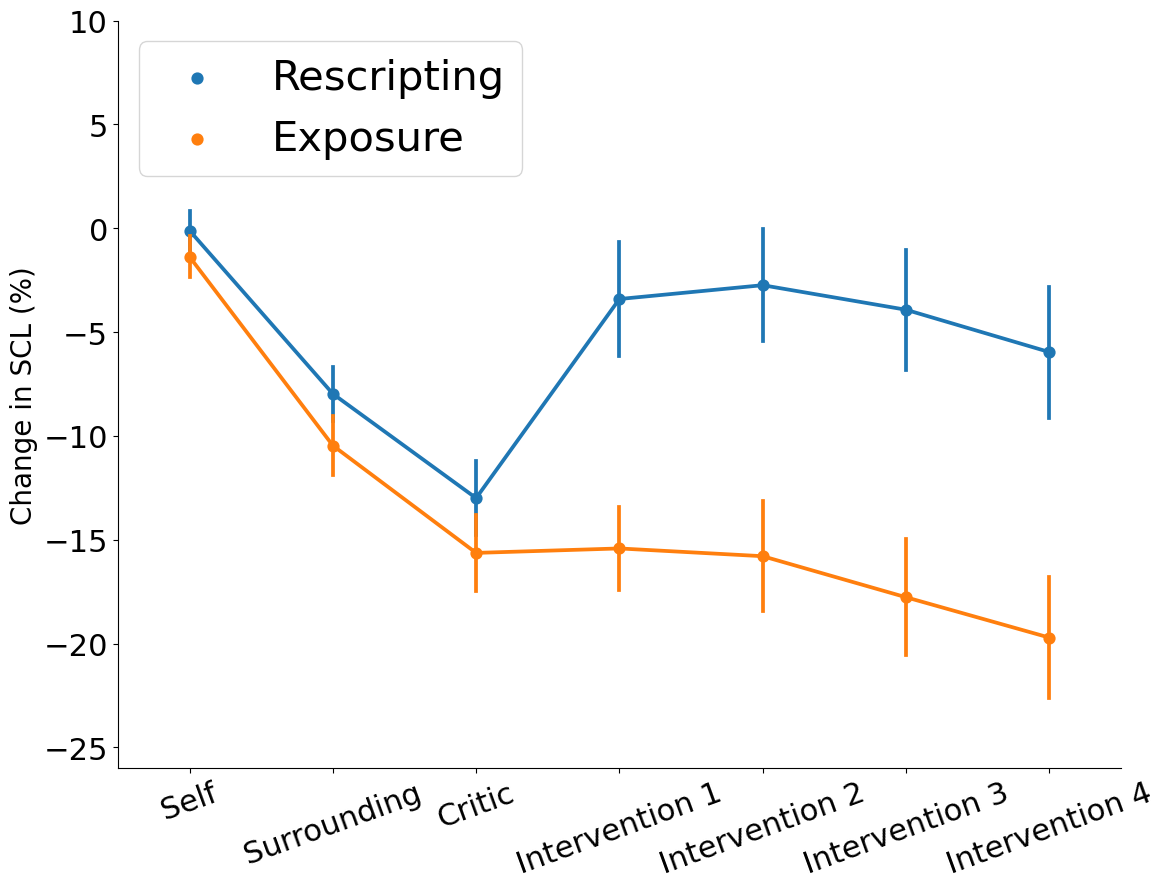

In [45]:
time_point = {'TP2':['First listening of intervention',[-26,10]]}
scenario = {'Neut':'Neutral scenario','CritT':'Criticism scenario'}

colset_dict = {'TP1':['Self','Surrounding','Critic','Interaction'],
              'TP2':['Self','Surrounding','Critic','Intervention 1', 'Intervention 2','Intervention 3','Intervention 4'],
              'TP63':['Self','Surrounding','Critic','Interaction'],
              'TP73':['Self','Surrounding','Critic','Interaction'],
              'TP83':['Self','Surrounding','Critic','Interaction']}

tp = 'TP73'
cond = 'Neut'

for tpoint in list(time_point.keys()):
    for scen in list(scenario.keys()):
        try:
            tp = tpoint
            tp_formal = time_point[tp][0]
            scen_formal = scenario[scen]
            cond = scen
            group = group_12
            title = f'{scen_formal} {tp_formal}'
            ylab = 'Change in SCL (%)'

            plt.figure(figsize=(20,30))

            tmp = result.loc[group,result.columns.str.contains(fr'SCL_{tp}_{cond}_P.*')]
            tmp.columns = colset_dict[tpoint]
            tmp['Condition'] = result['Condition_x_first']
            tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
            sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='se'
                        ,height=9, aspect=1.3,legend=False)


            plt.xlabel('',fontsize=20)
            plt.ylabel(ylab,fontsize=20)
            plt.xticks(fontsize=22,rotation=20)
            plt.yticks(fontsize=22)
#             plt.title(title,fontsize=30)

            plt.ylim(time_point[tp][1])
            plt.legend(loc='upper left',fontsize=30)

            plt.tight_layout()
            plt.savefig(f'{scen_formal} {tp_formal}.png')
        except:
            pass
plt.show()

<Figure size 2000x3000 with 0 Axes>

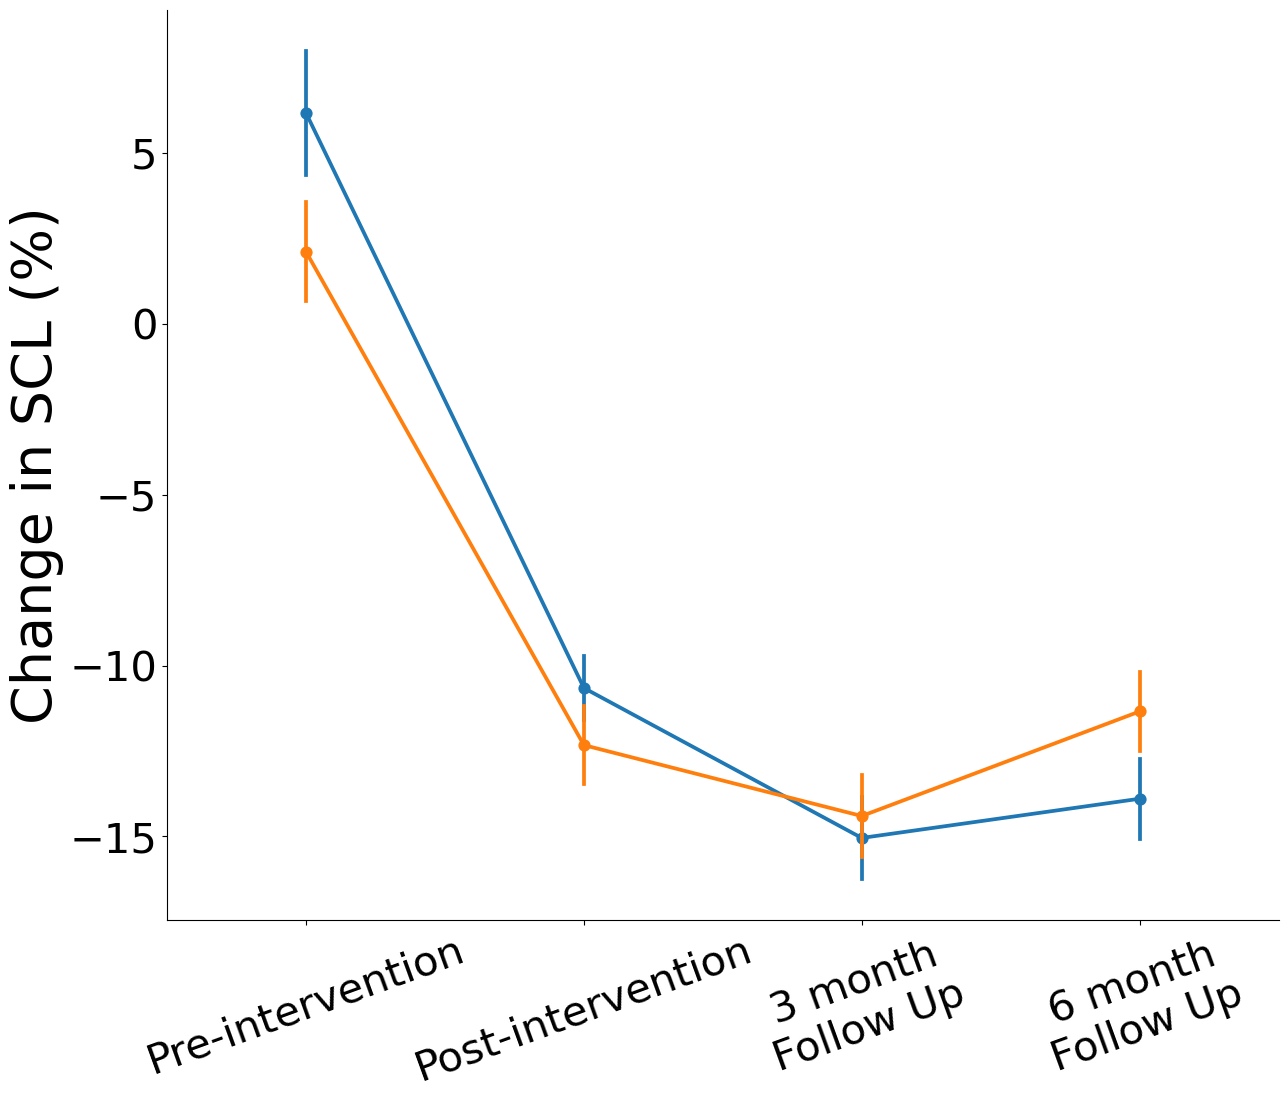

<Figure size 2000x3000 with 0 Axes>

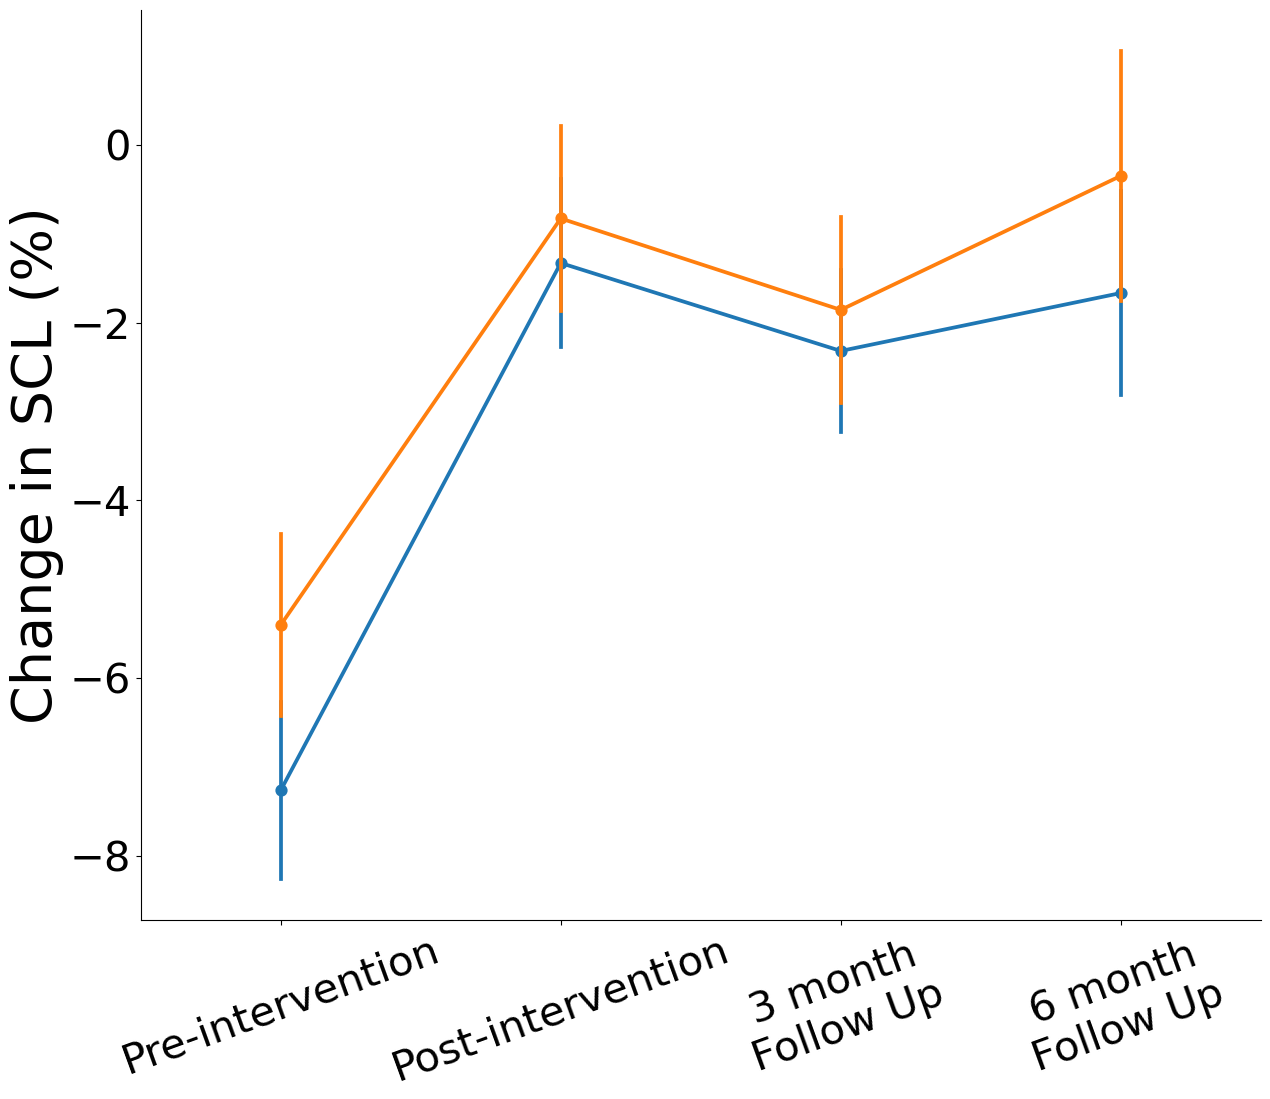

<Figure size 2000x3000 with 0 Axes>

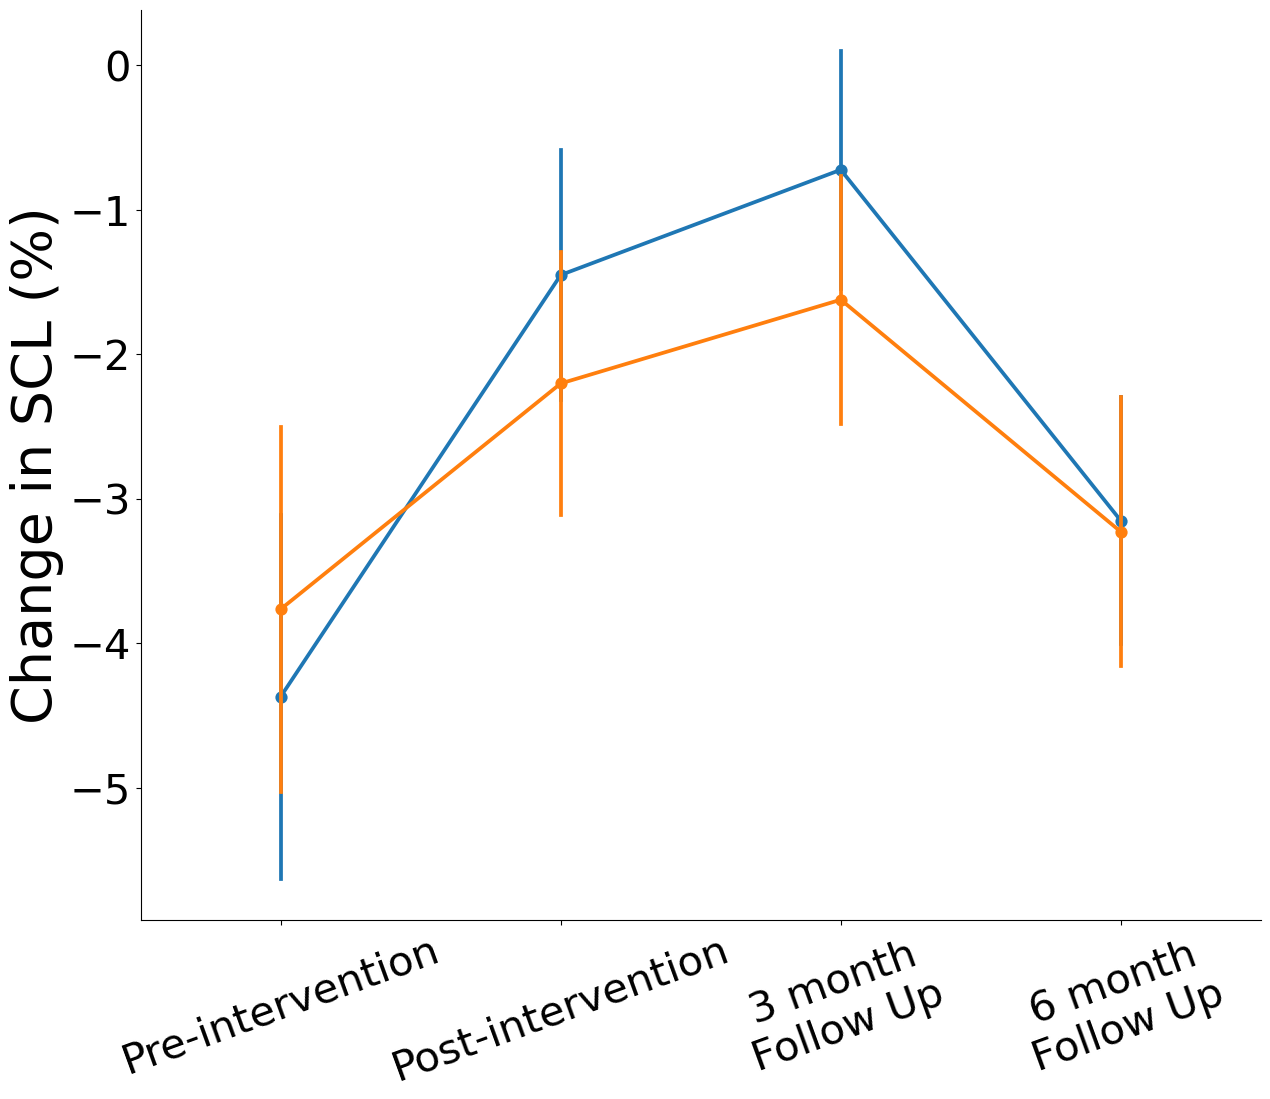

<Figure size 2000x3000 with 0 Axes>

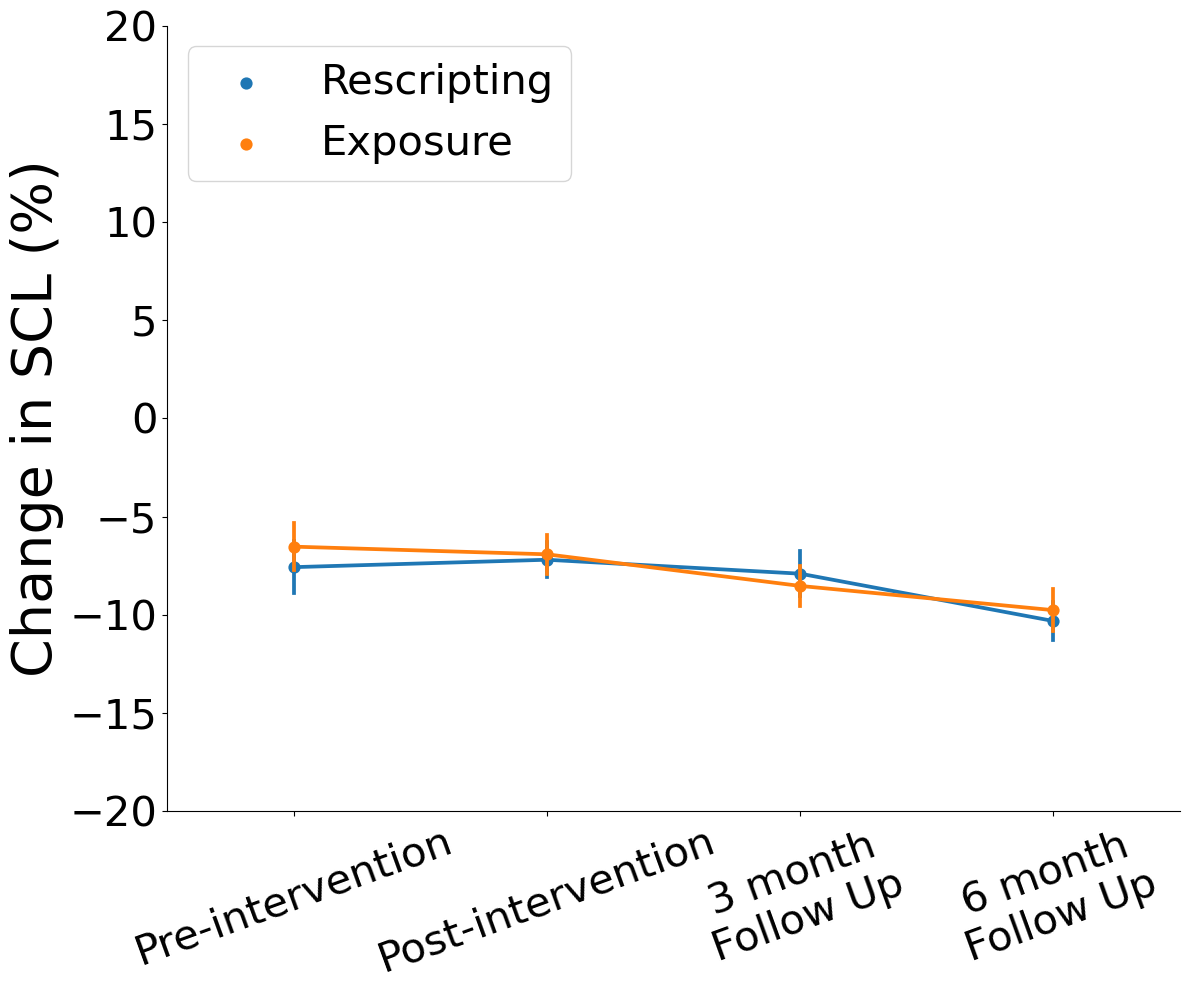

In [46]:

cond = 'Neut'
group = group_12
title = f'{scen_formal} {tp_formal}'
for cond in ['CritT','Neut','Neg','Crit']:
    post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
    ylab = 'Change in SCL (%)'
    post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
    colnames = ['Pre-intervention','Post-intervention','3 month\nFollow Up','6 month\nFollow Up']
    # colnames = ['Pomiar bazowy','Po interwencji']
    part_suspence='suspence'
    title = f'{cond} scenario reactivation'

    plt.figure(figsize=(20,30))

    tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP1_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
    # tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP\d_{cond}_{part_suspeaance}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]

    # tmp.columns = ['Ja','Otoczenie','Krytyk','Interwencja 1','Interwencja 2','Interwencja 3','Interwencja 4']
    tmp.columns = colnames
    tmp['Condition'] = result['Condition_x_first']
    tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
    sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='se',height=10, aspect=1.2,legend=False)


    plt.xlabel('',fontsize=40)
    plt.ylabel(ylab,fontsize=40)
    plt.xticks(fontsize=30,rotation=20)
    plt.yticks(fontsize=30)
    # plt.title(title,fontsize=30)

plt.ylim([-20,20])
plt.legend(loc='upper left',fontsize=30)

plt.tight_layout()
plt.savefig(f'{title}.png')

<Figure size 2000x3000 with 0 Axes>

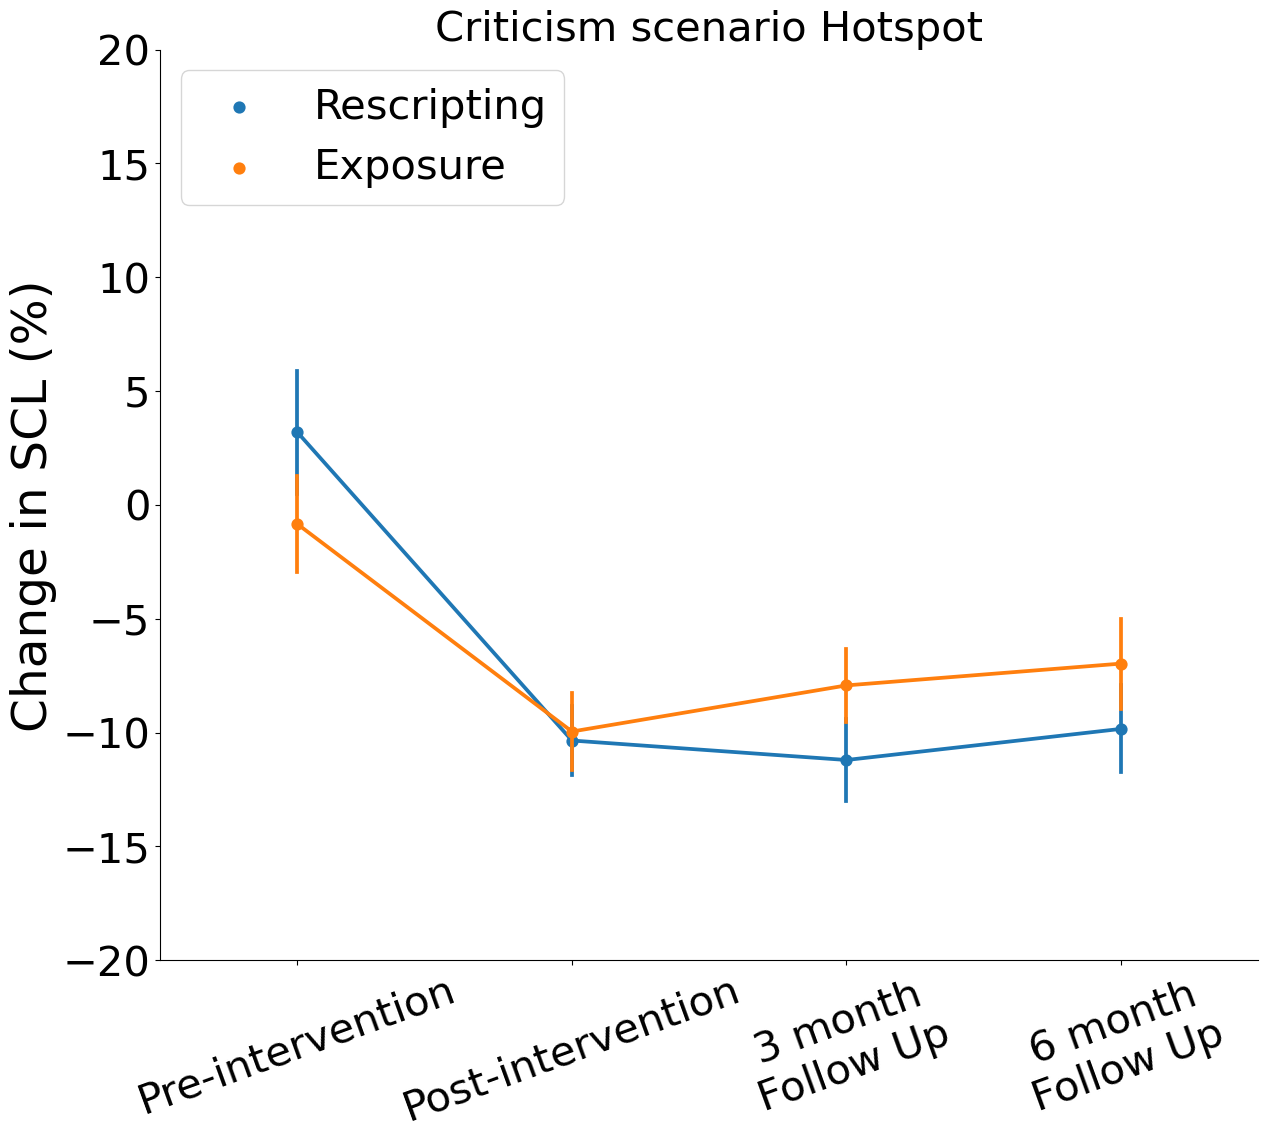

In [47]:

cond = 'CritT'
group = group_12
title = f'{scen_formal} {tp_formal}'
ylab = 'Change in SCL (%)'
post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
colnames = ['Pre-intervention','Post-intervention','3 month\nFollow Up','6 month\nFollow Up']
# colnames = ['Pomiar bazowy','3 mies.\nFollow Up']
# colnames = ['Pomiar bazowy','Po interwencji']
part_suspence='P4'
title = f'Criticism scenario Hotspot'

plt.figure(figsize=(20,30),tight_layout=True)

tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP1_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
# tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP\d_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]

# tmp.columns = ['Ja','Otoczenie','Krytyk','Interwencja 1','Interwencja 2','Interwencja 3','Interwencja 4']
tmp.columns = colnames
tmp['Condition'] = result['Condition_x_first']
tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='se',height=10, aspect=1.2,legend=False)


plt.xlabel('',fontsize=35)
plt.ylabel(ylab,fontsize=35)
plt.xticks(fontsize=30,rotation=20)
plt.yticks(fontsize=30)
plt.title(title,fontsize=30)

plt.ylim([-20,20])
plt.legend(loc='upper left',fontsize=30)

plt.savefig(f'{title}.png')

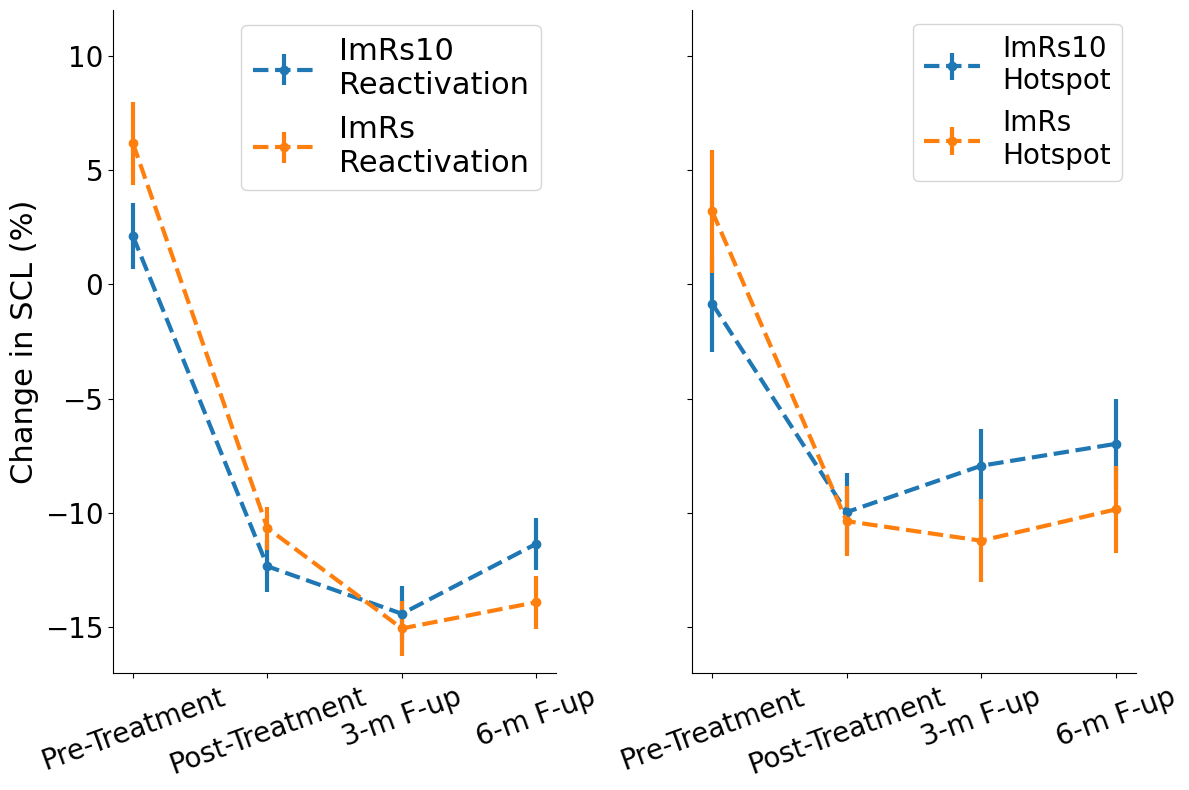

In [59]:
# Prepare all parameters

pd.options.mode.chained_assignment = None
ylab = 'Change in SCL (%)'
post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
colnames = ['Pre-intervention','Post-intervention','3 month\nFollow Up','6 month\nFollow Up']
cond = 'CritT'
group = group_12
ylab = 'Change in SCL (%)'

X = np.arange(4)

#Plot subplots
fig, ax = plt.subplots(2,1,figsize=[12,8])

#Prepare Dataset
part_suspence='suspence'
tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP[1,6,7,8]_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
tmp.columns = colnames

#actual plot
ax1 = plt.subplot(121)
ax1.errorbar(X, tmp.loc[group2,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group2,:],group2), 
             fmt='--o',label='ImRs10\nReactivation',linewidth=3)
ax1.errorbar(X, tmp.loc[group1,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group1,:],group1), 
             fmt='--o',label='ImRs\nReactivation',linewidth=3)


#Additional features of plot
plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-m F-up','6-m F-up'],
           fontsize=20,
           rotation=20)
plt.ylim([-17,12])
plt.ylabel(ylab,fontsize=22)
plt.legend(loc='upper right',fontsize=22)
plt.yticks(fontsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

#Prepare Dataset
part_suspence='P4'
tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP1_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
tmp.columns = colnames



#actual plot
ax2 = plt.subplot(122,sharey=ax1)
plt.tick_params('y',labelleft=False)
# plt.plot(tmp.loc[group1,:].mean(),label='ImRs')

# plt.plot(tmp.loc[group2,:].mean(),label='ImRs10')
ax2.errorbar(X, tmp.loc[group2,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group2,:],group2), 
             fmt='--o',
             label='ImRs10\nHotspot',
            linewidth=3)
ax2.errorbar(X, tmp.loc[group1,:].mean(numeric_only=True), 
             yerr=get_sterror(tmp.loc[group1,:],group1), fmt='--o',label='ImRs\nHotspot',linewidth=3)

#Additional features of plot
plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-m F-up','6-m F-up'],
           fontsize=20,
           rotation=20)
plt.ylim([-17,12])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)



plt.legend(loc='upper right',fontsize=20)


plt.tight_layout()
plt.savefig('Reactivation_hotspot_CritT.png')

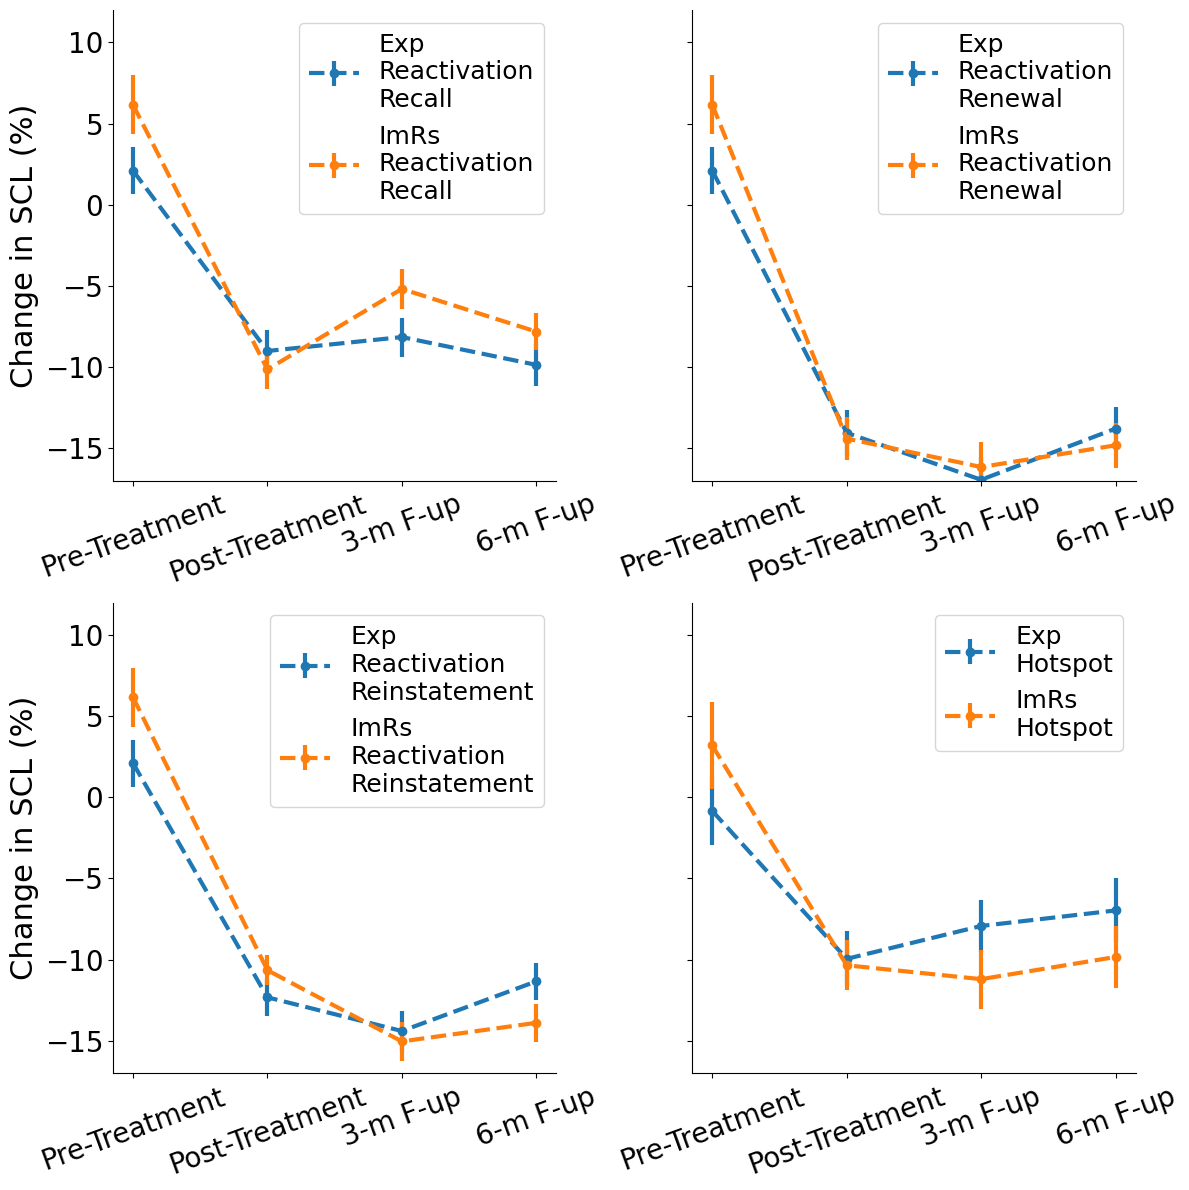

In [60]:
# Prepare all parameters

pd.options.mode.chained_assignment = None
ylab = 'Change in SCL (%)'
post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
colnames = ['Pre-intervention','Post-intervention','3 month\nFollow Up','6 month\nFollow Up']

X = np.arange(4)

#Plot subplots
fig, ax = plt.subplots(2,2,figsize=[12,12])

#Prepare Dataset
part_suspence='suspence'
tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP[1,6,7,8]_{cond}_{part_suspence}|SCL_TP[{post_time_point}][1]_{cond}_{part_suspence}')]
tmp.columns = colnames

#actual plot
ax1 = plt.subplot(221)
ax1.errorbar(X, tmp.loc[group2,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group2,:],group2), 
             fmt='--o',label='Exp\nReactivation\nRecall',linewidth=3)
ax1.errorbar(X, tmp.loc[group1,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group1,:],group1), 
             fmt='--o',label='ImRs\nReactivation\nRecall',linewidth=3)


#Additional features of plot
plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-m F-up','6-m F-up'],
           fontsize=20,
           rotation=20)
plt.ylim([-17,12])
plt.ylabel(ylab,fontsize=22)
plt.legend(loc='upper right',fontsize=18)
plt.yticks(fontsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


#Prepare Dataset
part_suspence='suspence'
tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP[1,6,7,8]_{cond}_{part_suspence}|SCL_TP[{post_time_point}][2]_{cond}_{part_suspence}')]
tmp.columns = colnames

#actual plot
ax2 = plt.subplot(222,sharey=ax1)
plt.tick_params('y',labelleft=False)
ax2.errorbar(X, tmp.loc[group2,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group2,:],group2), 
             fmt='--o',label='Exp\nReactivation\nRenewal',linewidth=3)
ax2.errorbar(X, tmp.loc[group1,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group1,:],group1), 
             fmt='--o',label='ImRs\nReactivation\nRenewal',linewidth=3)


#Additional features of plot
plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-m F-up','6-m F-up'],
           fontsize=20,
           rotation=20)
plt.ylim([-17,12])
plt.legend(loc='upper right',fontsize=18)
plt.yticks(fontsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)



#Prepare Dataset
part_suspence='suspence'
tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP[1,6,7,8]_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
tmp.columns = colnames

#actual plot
ax3 = plt.subplot(223)
ax3.errorbar(X, tmp.loc[group2,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group2,:],group2), 
             fmt='--o',label='Exp\nReactivation\nReinstatement',linewidth=3)
ax3.errorbar(X, tmp.loc[group1,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group1,:],group1), 
             fmt='--o',label='ImRs\nReactivation\nReinstatement',linewidth=3)


#Additional features of plot
plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-m F-up','6-m F-up'],
           fontsize=20,
           rotation=20)
plt.ylim([-17,12])
plt.ylabel(ylab,fontsize=22)
plt.legend(loc='upper right',fontsize=18)
plt.yticks(fontsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)






#Prepare Dataset
part_suspence='P4'
tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP1_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
tmp.columns = colnames


#actual plot
ax4 = plt.subplot(224,sharey=ax1)
plt.tick_params('y',labelleft=False)
# plt.plot(tmp.loc[group1,:].mean(),label='ImRs')

# plt.plot(tmp.loc[group2,:].mean(),label='Exp')
ax4.errorbar(X, tmp.loc[group2,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group2,:],group2), 
             fmt='--o',
             label='Exp\nHotspot',
            linewidth=3)
ax4.errorbar(X, tmp.loc[group1,:].mean(numeric_only=True), 
             yerr=get_sterror(tmp.loc[group1,:],group1), fmt='--o',label='ImRs\nHotspot',linewidth=3)

#Additional features of plot
plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-m F-up','6-m F-up'],
           fontsize=20,
           rotation=20)
plt.ylim([-17,12])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)



plt.legend(loc='upper right',fontsize=18)


plt.tight_layout()
plt.savefig('Reactivation_hotspot_CritT.png')

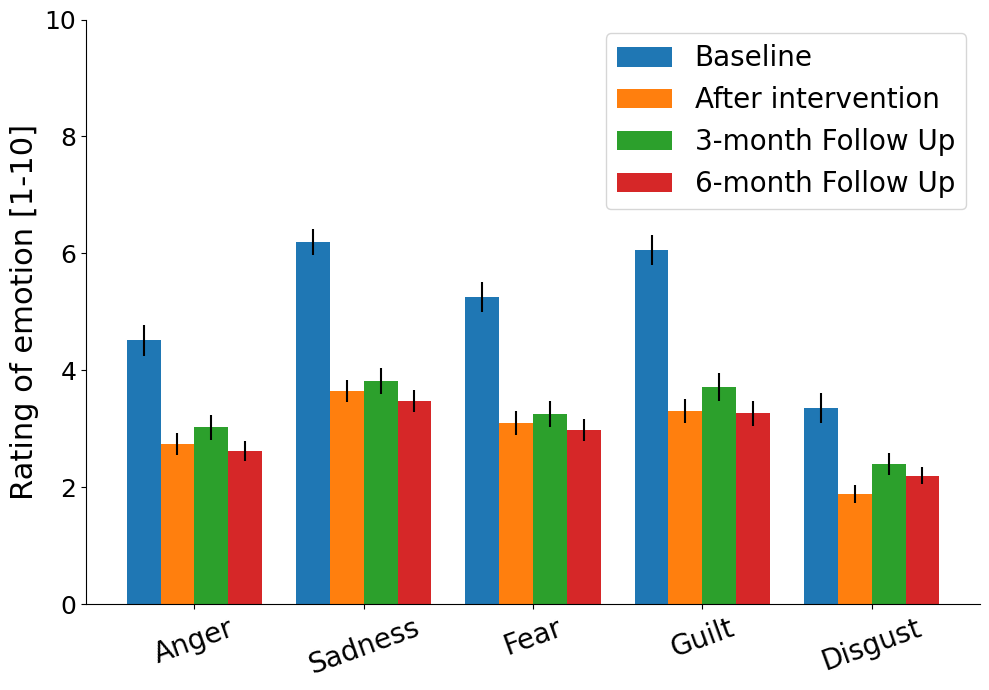

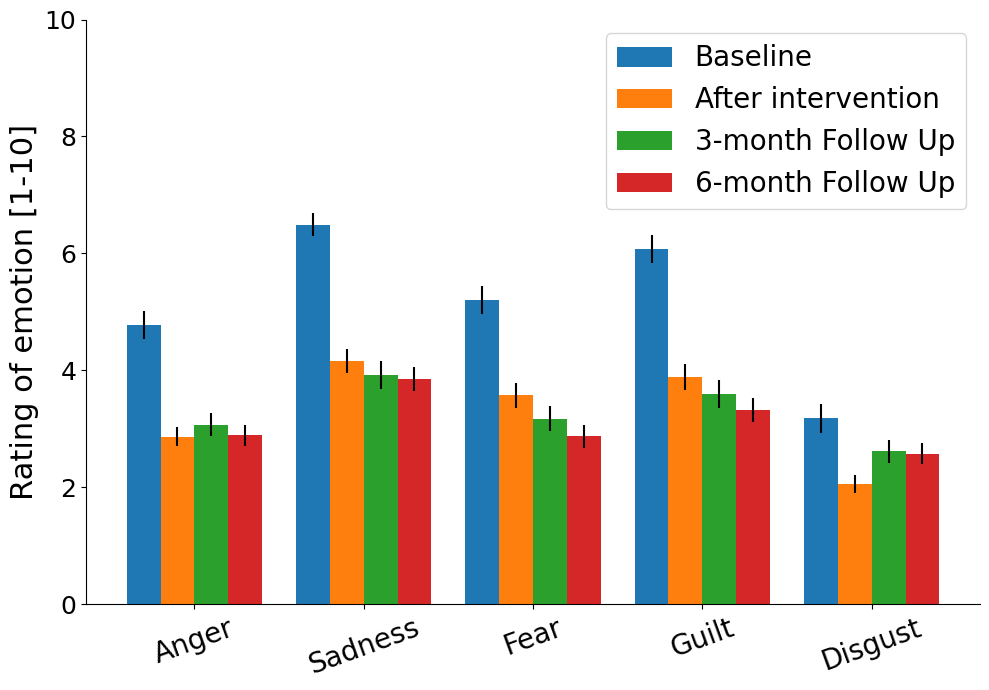

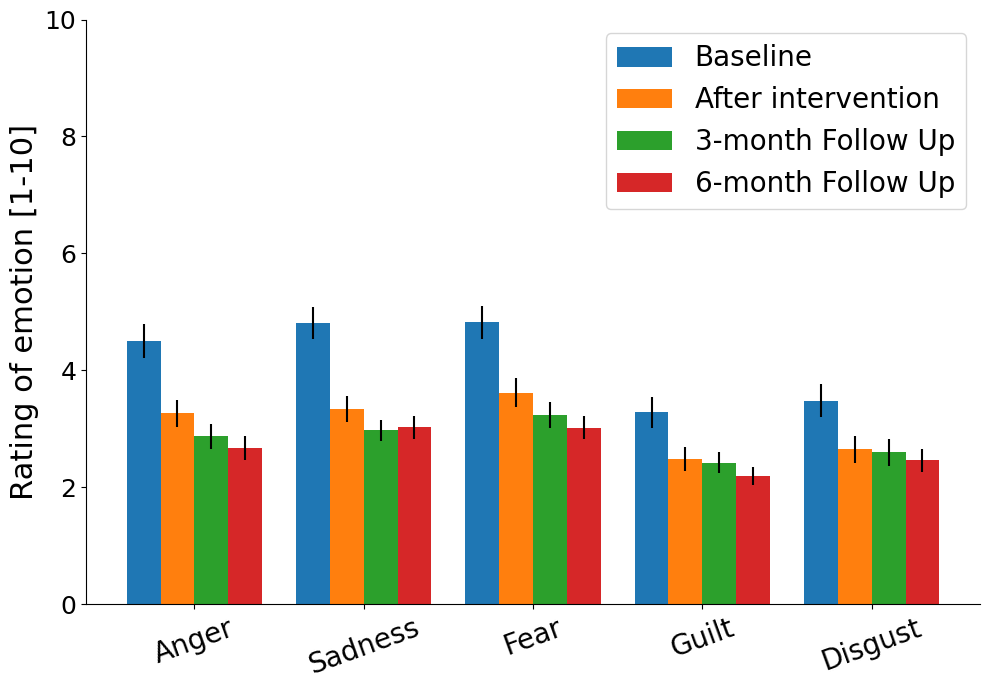

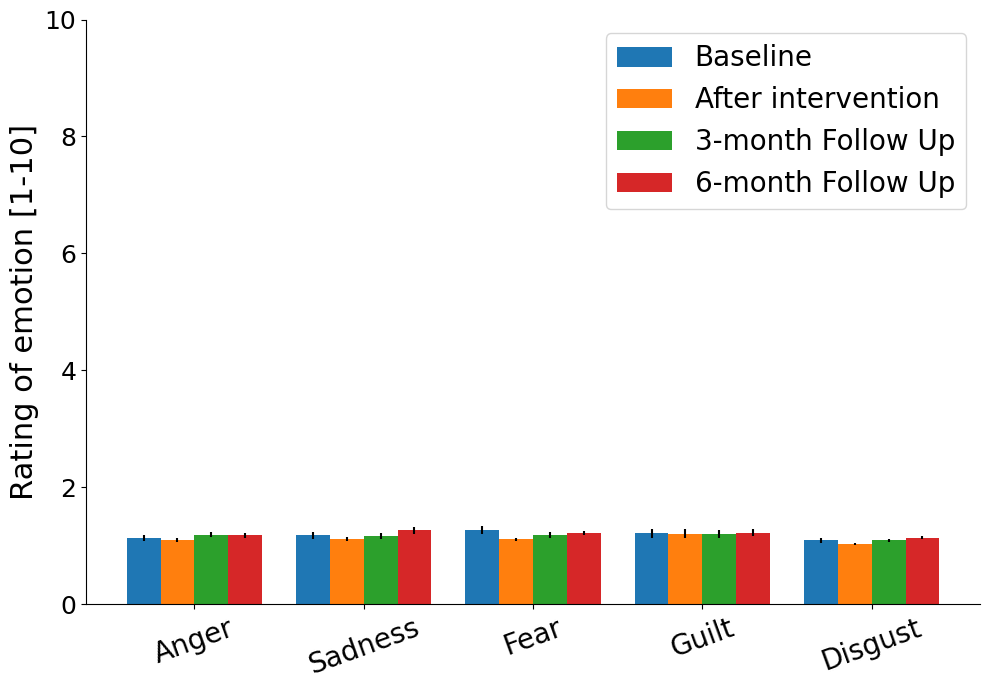

In [50]:
# part = 'suspence_mean'
part = '4'
cond = 'Neut'

for cond in ['CritT','Crit','Neg','Neut']:
    tp1 = result.loc[:,result.columns.str.contains(fr'rat_TP1_{cond}_.*{part}')].iloc[:,3:-2]
    tp2 = result.loc[:,result.columns.str.contains(fr'rat_TP2_{cond}_.*{part}')].iloc[:,3:-2]
    tp3 = result.loc[:,result.columns.str.contains(fr'rat_TP3_{cond}_.*{part}')].iloc[:,3:-2]
    tp4 = result.loc[:,result.columns.str.contains(fr'rat_TP4_{cond}_.*{part}')].iloc[:,3:-2]

    tp5 = result.loc[:,result.columns.str.contains(fr'rat_TP5_{cond}_.*{part}')].iloc[:,3:-2]
    tp6 = result.loc[:,result.columns.str.contains(fr'rat_TP6_{cond}_.*{part}')].iloc[:,3:-2]
    tp7 = result.loc[:,result.columns.str.contains(fr'rat_TP7_{cond}_.*{part}')].iloc[:,3:-2]
    tp8 = result.loc[:,result.columns.str.contains(fr'rat_TP8_{cond}_.*{part}')].iloc[:,3:-2]


    fig = plt.figure(figsize=[10,7])
    X = np.arange(len(tp1.T))

    plt.bar(X-0.3,tp1.loc[group_12,:].mean(),0.2,label='Baseline',yerr=get_sterror(tp1,group_12))

    plt.bar(X-0.1,tp6.loc[group_12,:].mean(),0.2,label='After intervention',yerr=get_sterror(tp6,group_12))

    plt.bar(X+0.1,tp7.loc[group_12,:].mean(),0.2,label='3-month Follow Up',yerr=get_sterror(tp7,group_12))

    plt.bar(X+0.3,tp8.loc[group_12,:].mean(),0.2,label='6-month Follow Up',yerr=get_sterror(tp8,group_12))


    plt.xticks(X, ['Anger','Sadness','Fear','Guilt','Disgust'],fontsize=20,rotation=20)
    plt.yticks(fontsize=18)
    plt.legend(fontsize = 20)
    # plt.title('Emotions rating of treated criticism scenario during hotspot',fontsize=20)
    plt.ylabel('Rating of emotion [1-10]',fontsize=22)
    plt.ylim([0,10])

    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)


    plt.tight_layout()
    plt.savefig(f'Emotions_rating_{cond}_hotspot.png')

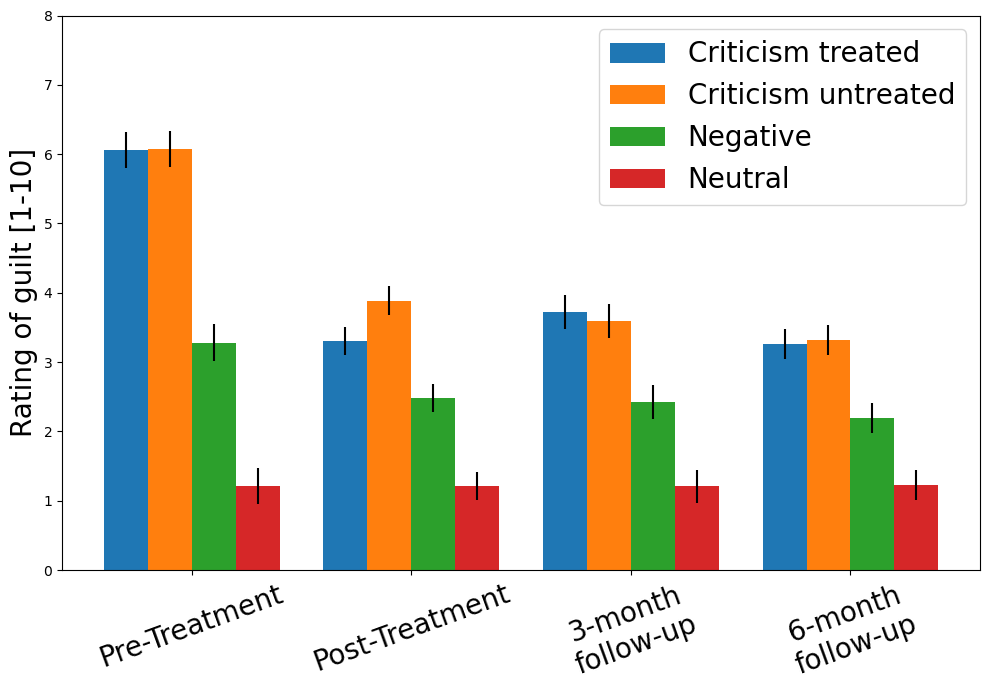

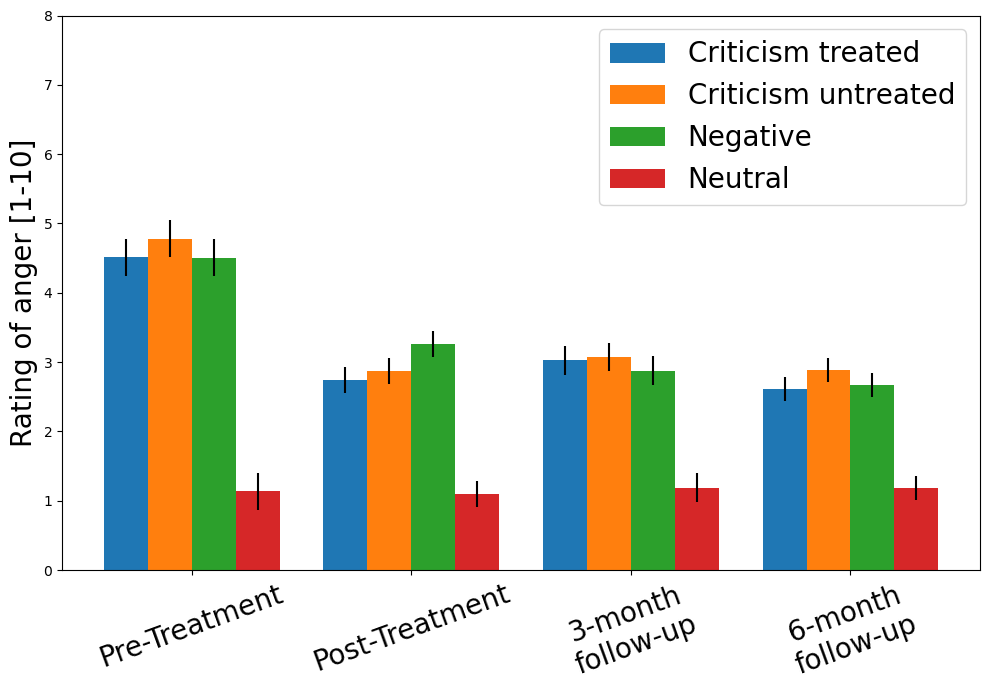

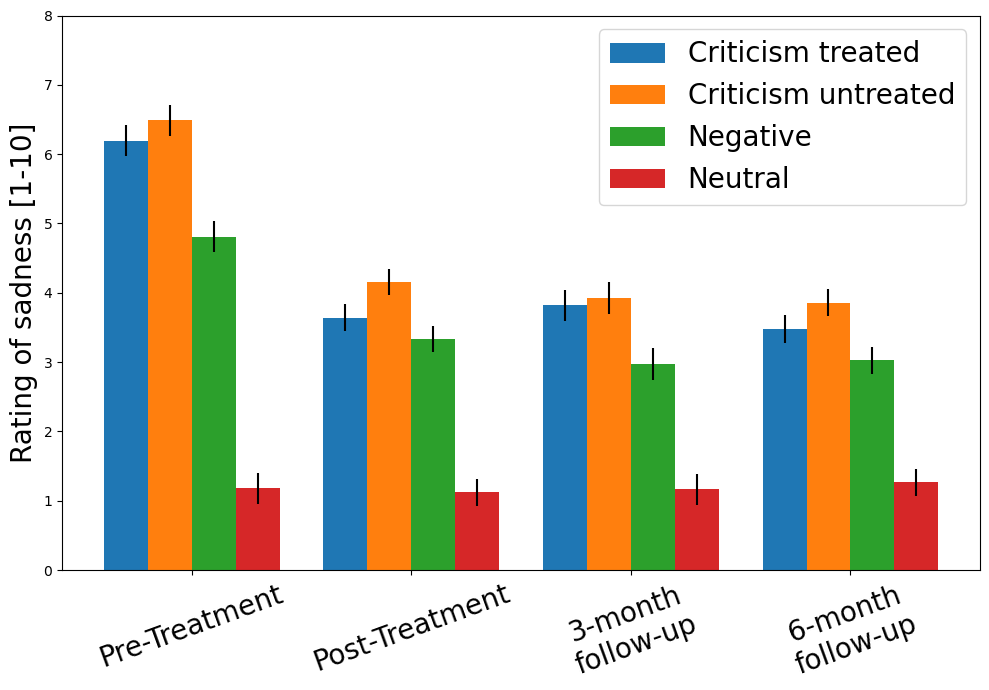

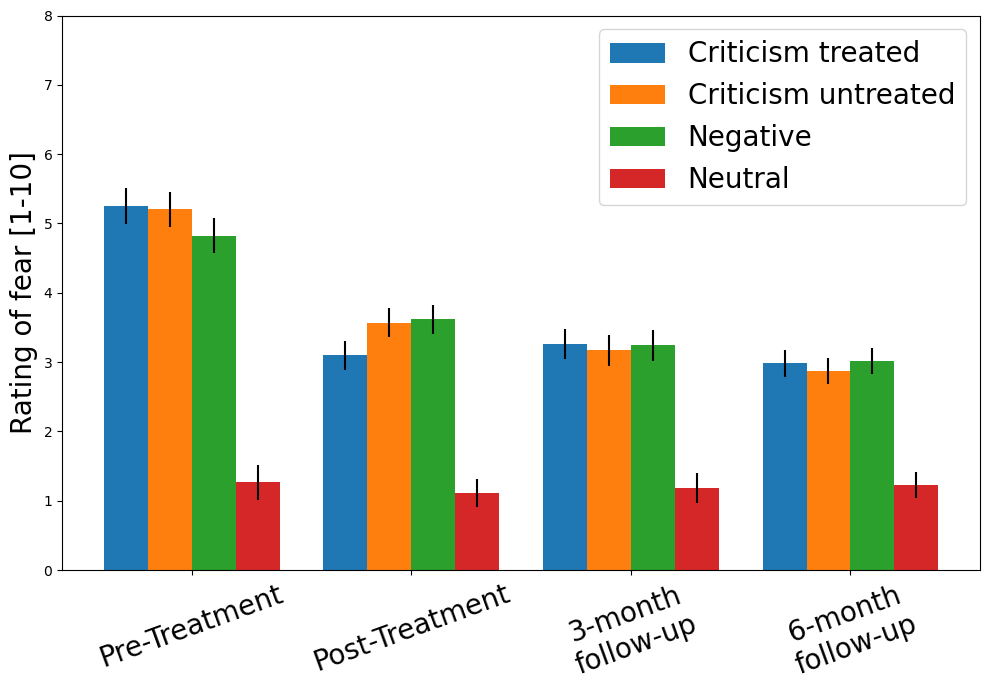

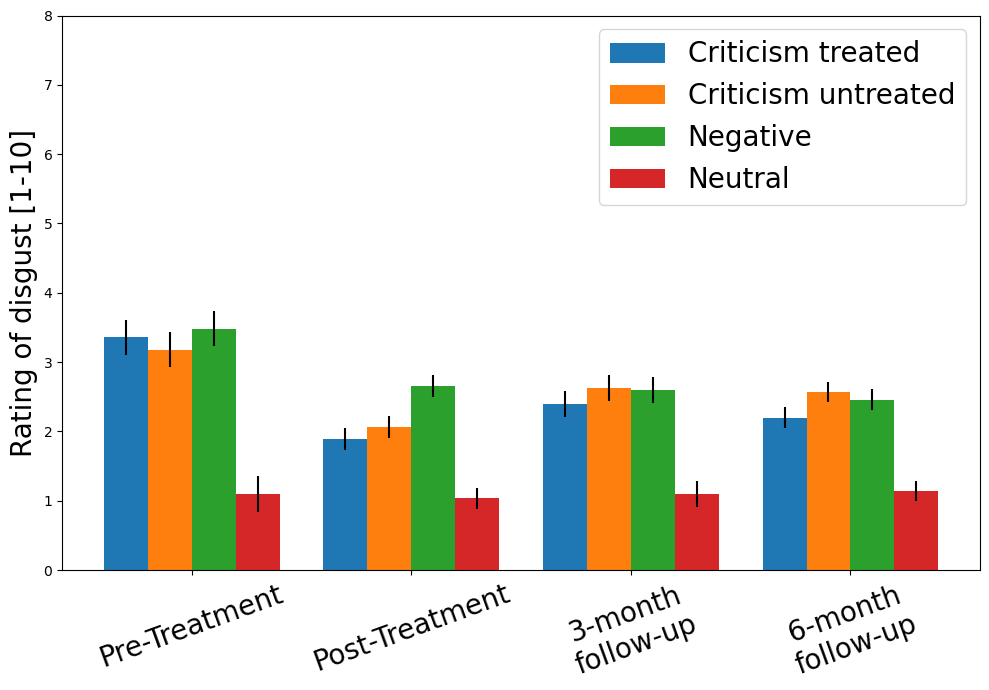

In [51]:
#Set which part of scenario, and which modality
part = 'P4'

modality='GUI'
label='guilt'

#Get rid of redundant warning
pd.options.mode.chained_assignment = None
for modality,label in zip(['GUI','ANG','SAD','FEA','DIS'],['guilt','anger','sadness','fear','disgust']):

    arousal_scenarios = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_(CritT|Crit|Neg|Neut)_.*{part}_{modality}*')]

    plt.figure(figsize=[10,7])
    X = np.arange(4)

    plt.bar(X-0.3,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')].mean(),0.2,label='Criticism treated',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
    plt.bar(X-0.1,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Crit_')].mean(),0.2,label='Criticism untreated',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
    plt.bar(X+0.1,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neg')].mean(),0.2,label='Negative',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
    plt.bar(X+0.3,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neut')].mean(),0.2,label='Neutral',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))


    plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
    plt.legend(fontsize = 20)
    # plt.title('Arousal rating for each scenario at each time point\nduring hotspot',fontsize=20)
    plt.ylabel(f'Rating of {label} [1-10]',fontsize=20)
    plt.ylim([0,8])

    plt.tight_layout()
    plt.savefig(f'Emotions_rating_diff_scenario_hotspot_{modality}.png')

# Plotting arousal

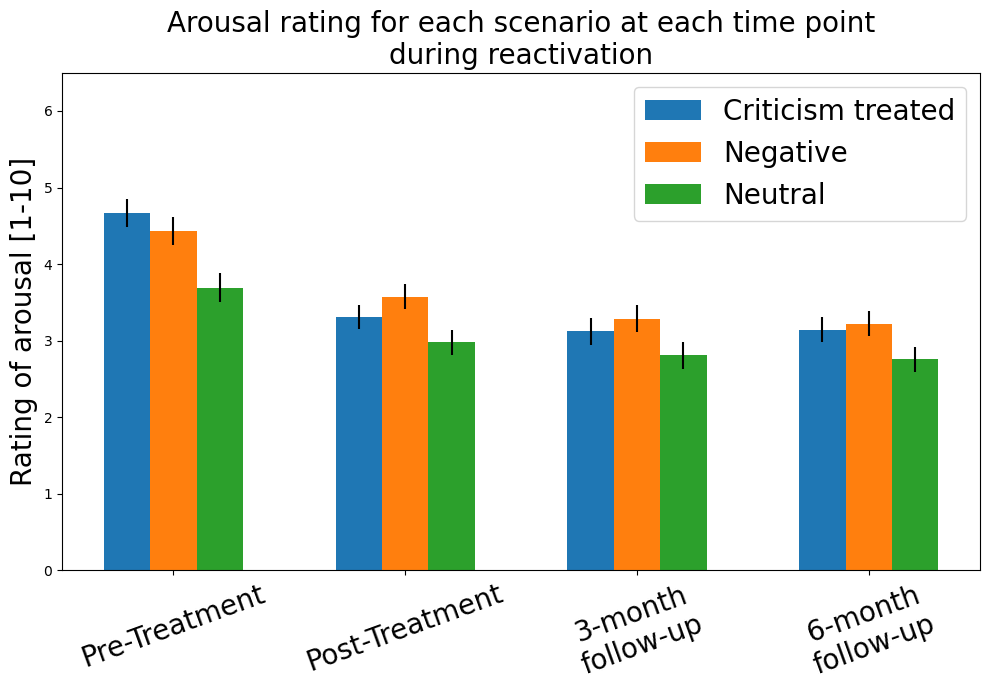

In [52]:

arousal_scenarios = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_(CritT|Neg|Neut)_ARO_suspence.*')]

plt.figure(figsize=[10,7])
X = np.arange(4)

plt.bar(X-0.2,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')].mean(),0.2,label='Criticism treated',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
# plt.bar(X-0.1,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Crit_')].mean(),0.2,label='Criticism untreated',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
plt.bar(X,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neg')].mean(),0.2,label='Negative',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
plt.bar(X+0.2,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neut')].mean(),0.2,label='Neutral',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))

plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
plt.legend(fontsize = 20)
plt.title('Arousal rating for each scenario at each time point\nduring reactivation',fontsize=20)
plt.ylabel('Rating of arousal [1-10]',fontsize=20)
plt.ylim([0,6.5])

plt.tight_layout()
plt.savefig('Emotions_rating_diff_scenario_reactivation.png')

# Plotting arousal for treated criticism scenario

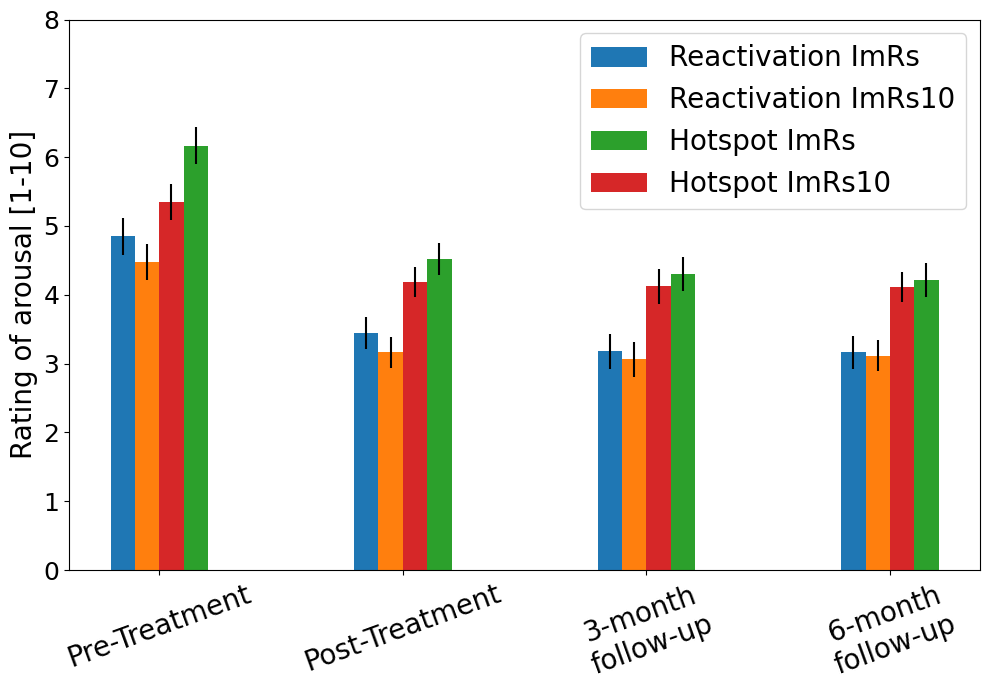

In [53]:

arousal_scenarios_sus = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_CritT_ARO_suspence.*')]
arousal_scenarios_hot = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_CritT_P4_ARO_.*')]
arousal_scenarios_sus

plt.figure(figsize=[10,7])
X = np.arange(4)

plt.bar(X-0.15,
        arousal_scenarios_sus.
        loc[group1,arousal_scenarios_sus.columns.str.contains('CritT')].mean(),
        0.1,
        label='Reactivation ImRs',
        yerr=get_sterror(arousal_scenarios.loc[group1,arousal_scenarios.columns.str.contains('CritT')],group1))

plt.bar(X-0.05,
        arousal_scenarios_sus.
        loc[group2,arousal_scenarios_sus.columns.str.contains('CritT')].mean(),
        0.1,
        label='Reactivation ImRs10',
        yerr=get_sterror(arousal_scenarios.loc[group2,arousal_scenarios.columns.str.contains('CritT')],group2))

plt.bar(X+0.15,
        arousal_scenarios_hot.
        loc[group1,arousal_scenarios_sus.columns.str.contains('CritT')].mean(),
        0.1,
        label='Hotspot ImRs',
        yerr=get_sterror(arousal_scenarios.loc[group1,arousal_scenarios.columns.str.contains('CritT')],group1))

plt.bar(X+0.05,
        arousal_scenarios_hot.
        loc[group2,arousal_scenarios_sus.columns.str.contains('CritT')].mean(),
        0.1,
        label='Hotspot ImRs10',
        yerr=get_sterror(arousal_scenarios.loc[group2,arousal_scenarios.columns.str.contains('CritT')],group2))


plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
plt.yticks(fontsize=18)
plt.legend(fontsize = 20)
plt.ylabel('Rating of arousal [1-10]',fontsize=20)
plt.ylim([0,8])
plt.tight_layout()
plt.savefig('Rating_arousal_group_react_hotspot.png')

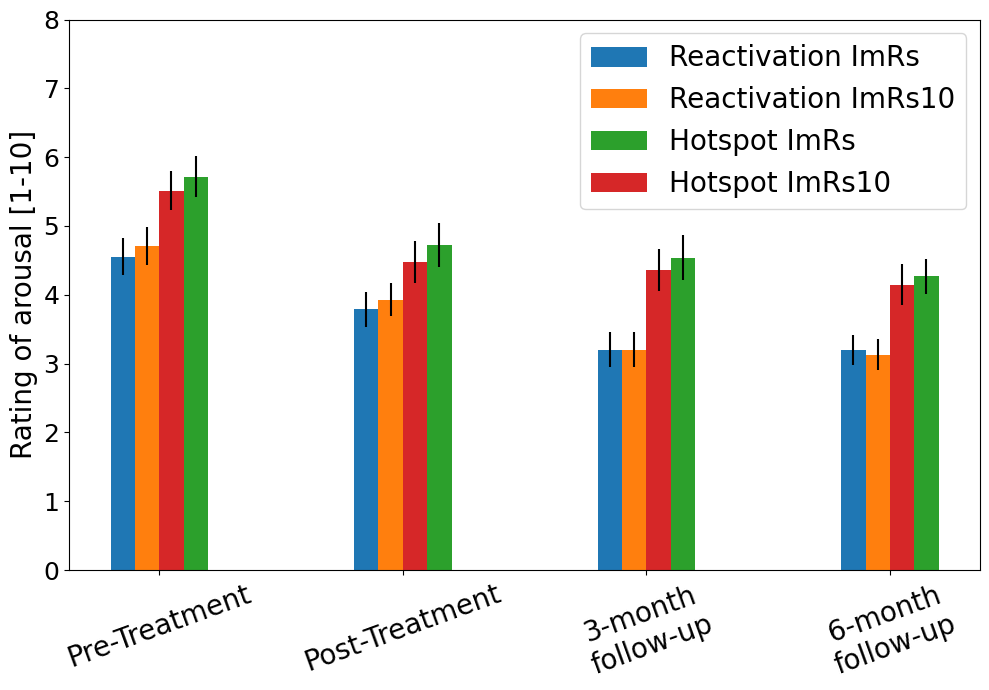

In [54]:

arousal_scenarios_sus = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_Crit_ARO_suspence.*')]
arousal_scenarios_hot = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_Crit_P4_ARO_.*')]
arousal_scenarios_sus

plt.figure(figsize=[10,7])
X = np.arange(4)

plt.bar(X-0.15,
        arousal_scenarios_sus.
        loc[group1,arousal_scenarios_sus.columns.str.contains('Crit')].mean(),
        0.1,
        label='Reactivation ImRs',
        yerr=get_sterror(arousal_scenarios_sus.loc[group1,arousal_scenarios_sus.columns.str.contains('Crit')],group1))

plt.bar(X-0.05,
        arousal_scenarios_sus.
        loc[group2,arousal_scenarios_sus.columns.str.contains('Crit')].mean(),
        0.1,
        label='Reactivation ImRs10',
        yerr=get_sterror(arousal_scenarios_sus.loc[group2,arousal_scenarios_sus.columns.str.contains('Crit')],group2))

plt.bar(X+0.15,
        arousal_scenarios_hot.
        loc[group1,arousal_scenarios_sus.columns.str.contains('Crit')].mean(),
        0.1,
        label='Hotspot ImRs',
        yerr=get_sterror(arousal_scenarios_hot.loc[group1,arousal_scenarios_hot.columns.str.contains('Crit')],group1))

plt.bar(X+0.05,
        arousal_scenarios_hot.
        loc[group2,arousal_scenarios_hot.columns.str.contains('Crit')].mean(),
        0.1,
        label='Hotspot ImRs10',
        yerr=get_sterror(arousal_scenarios_hot.loc[group2,arousal_scenarios_hot.columns.str.contains('Crit')],group2))


plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
plt.yticks(fontsize=18)
plt.legend(fontsize = 20)
plt.ylabel('Rating of arousal [1-10]',fontsize=20)
plt.ylim([0,8])
plt.tight_layout()
plt.savefig('Rating_arousal_group_react_hotspot_untreaed.png')

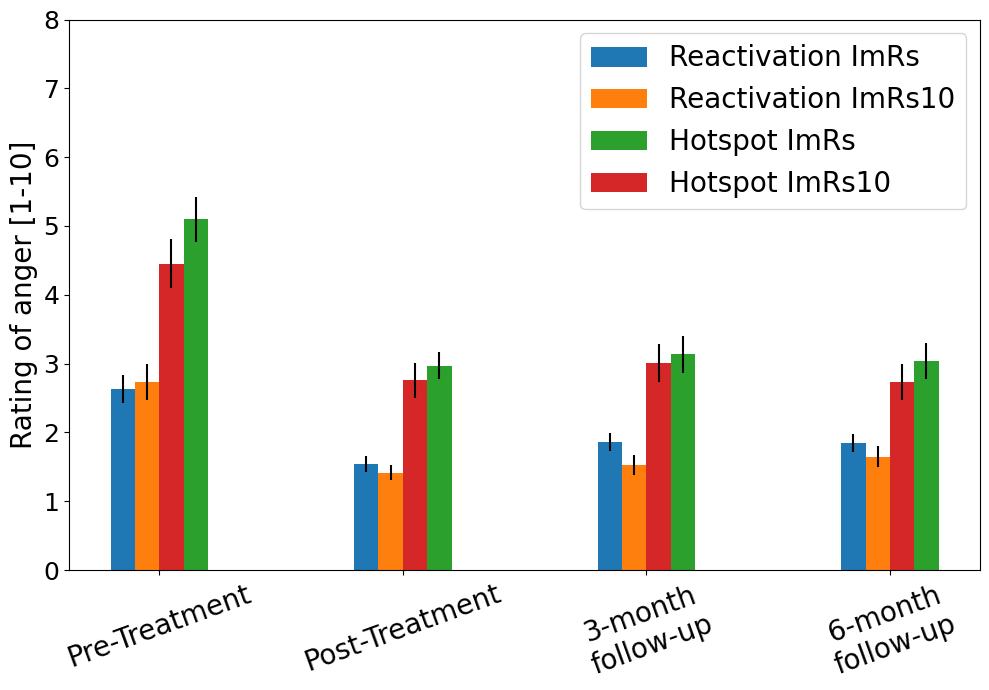

In [55]:

arousal_scenarios_sus = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_Crit_ANG_suspence.*')]
arousal_scenarios_hot = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_Crit_P4_ANG_.*')]
arousal_scenarios_sus

plt.figure(figsize=[10,7])
X = np.arange(4)

plt.bar(X-0.15,
        arousal_scenarios_sus.
        loc[group1,arousal_scenarios_sus.columns.str.contains('Crit')].mean(),
        0.1,
        label='Reactivation ImRs',
        yerr=get_sterror(arousal_scenarios_sus.loc[group1,arousal_scenarios_sus.columns.str.contains('Crit')],group1))

plt.bar(X-0.05,
        arousal_scenarios_sus.
        loc[group2,arousal_scenarios_sus.columns.str.contains('Crit')].mean(),
        0.1,
        label='Reactivation ImRs10',
        yerr=get_sterror(arousal_scenarios_sus.loc[group2,arousal_scenarios_sus.columns.str.contains('Crit')],group2))

plt.bar(X+0.15,
        arousal_scenarios_hot.
        loc[group1,arousal_scenarios_sus.columns.str.contains('Crit')].mean(),
        0.1,
        label='Hotspot ImRs',
        yerr=get_sterror(arousal_scenarios_hot.loc[group1,arousal_scenarios_hot.columns.str.contains('Crit')],group1))

plt.bar(X+0.05,
        arousal_scenarios_hot.
        loc[group2,arousal_scenarios_hot.columns.str.contains('Crit')].mean(),
        0.1,
        label='Hotspot ImRs10',
        yerr=get_sterror(arousal_scenarios_hot.loc[group2,arousal_scenarios_hot.columns.str.contains('Crit')],group2))


plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
plt.yticks(fontsize=18)
plt.legend(fontsize = 20)
plt.ylabel('Rating of anger [1-10]',fontsize=20)
plt.ylim([0,8])
plt.tight_layout()
plt.savefig('Rating_anger_group_react_hotspot_untreaed.png')

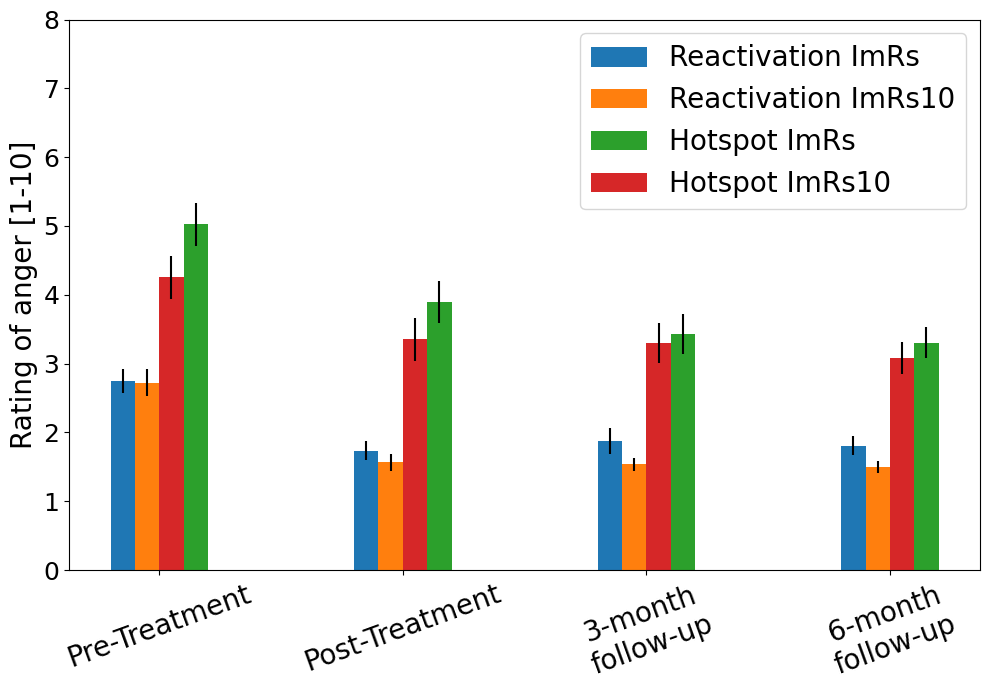

In [56]:
#Added Lacking "Future" scenario at preatreatment
result['rat_TP1_Future_ANG_suspence_mean'] = result.loc[:,result.columns.str.contains(r'rat_TP1_Crit.*P[1,2,3]_ANG_mean')].mean(axis=1)
result['rat_TP1_Future_ARO_suspence_mean'] = result.loc[:,result.columns.str.contains(r'rat_TP1_Crit.*P[1,2,3]_ARO_mean')].mean(axis=1)
result['rat_TP1_Future_P4_ARO_mean'] = result.loc[:,result.columns.str.contains(r'rat_TP1_Crit.*P[4]_ARO_mean')].mean(axis=1)
result['rat_TP1_Future_P4_ANG_mean'] = result.loc[:,result.columns.str.contains(r'rat_TP1_Crit.*P[4]_ANG_mean')].mean(axis=1)



arousal_scenarios_sus = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_Future_ANG_suspence.*')]
new_col = list(arousal_scenarios_sus.columns)
new_col = [new_col[3],new_col[0],new_col[1],new_col[2]]
arousal_scenarios_sus =arousal_scenarios_sus.loc[:,new_col]


arousal_scenarios_hot = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_Future_P4_ANG_.*')]
new_col = list(arousal_scenarios_hot.columns)
new_col = [new_col[3],new_col[0],new_col[1],new_col[2]]
arousal_scenarios_hot =arousal_scenarios_hot.loc[:,new_col]

plt.figure(figsize=[10,7])
X = np.arange(4)

plt.bar(X-0.15,
        arousal_scenarios_sus.
        loc[group1,arousal_scenarios_sus.columns.str.contains('Future')].mean(),
        0.1,
        label='Reactivation ImRs',
        yerr=get_sterror(arousal_scenarios_sus.loc[group1,arousal_scenarios_sus.columns.str.contains('Future')],group1))

plt.bar(X-0.05,
        arousal_scenarios_sus.
        loc[group2,arousal_scenarios_sus.columns.str.contains('Future')].mean(),
        0.1,
        label='Reactivation ImRs10',
        yerr=get_sterror(arousal_scenarios_sus.loc[group2,arousal_scenarios_sus.columns.str.contains('Future')],group2))

plt.bar(X+0.15,
        arousal_scenarios_hot.
        loc[group1,arousal_scenarios_sus.columns.str.contains('Future')].mean(),
        0.1,
        label='Hotspot ImRs',
        yerr=get_sterror(arousal_scenarios_hot.loc[group1,arousal_scenarios_hot.columns.str.contains('Future')],group1))

plt.bar(X+0.05,
        arousal_scenarios_hot.
        loc[group2,arousal_scenarios_hot.columns.str.contains('Future')].mean(),
        0.1,
        label='Hotspot ImRs10',
        yerr=get_sterror(arousal_scenarios_hot.loc[group2,arousal_scenarios_hot.columns.str.contains('Future')],group2))


plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
plt.yticks(fontsize=18)
plt.legend(fontsize = 20)
plt.ylabel('Rating of anger [1-10]',fontsize=20)
plt.ylim([0,8])
plt.tight_layout()
plt.savefig('Rating_anger_group_react_hotspot_future.png')

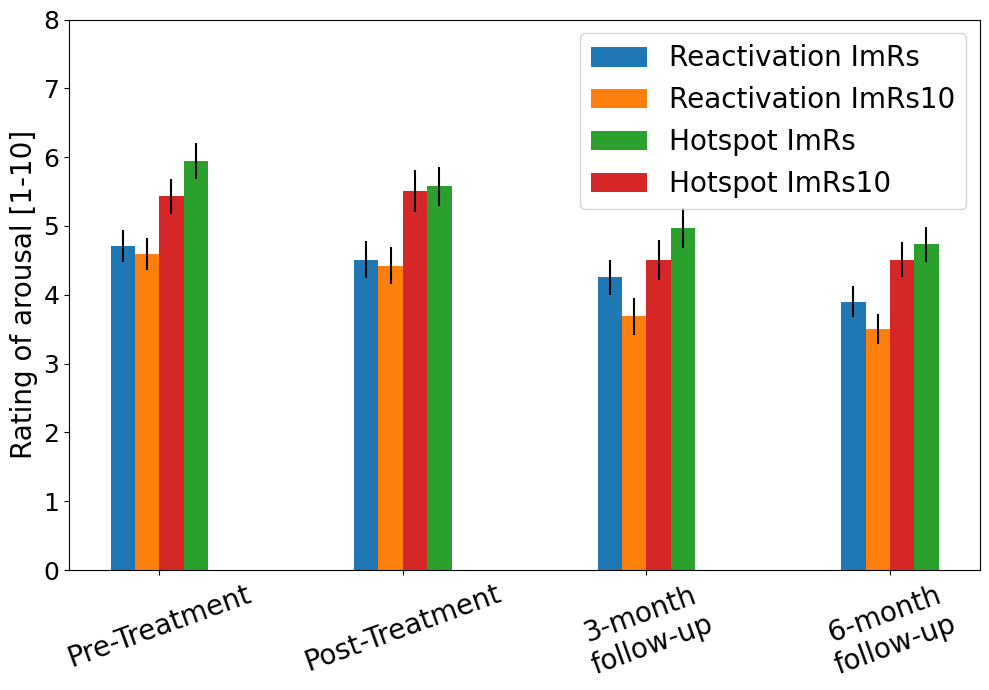

In [57]:

arousal_scenarios_sus = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_Future_ARO_suspence.*')]
new_col = list(arousal_scenarios_sus.columns)
new_col = [new_col[3],new_col[0],new_col[1],new_col[2]]
arousal_scenarios_sus =arousal_scenarios_sus.loc[:,new_col]

arousal_scenarios_hot = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_Future_P4_ARO_.*')]
new_col = list(arousal_scenarios_hot.columns)
new_col = [new_col[3],new_col[0],new_col[1],new_col[2]]
arousal_scenarios_hot =arousal_scenarios_hot.loc[:,new_col]

plt.figure(figsize=[10,7])
X = np.arange(4)

plt.bar(X-0.15,
        arousal_scenarios_sus.
        loc[group1,arousal_scenarios_sus.columns.str.contains('Future')].mean(),
        0.1,
        label='Reactivation ImRs',
        yerr=get_sterror(arousal_scenarios_sus.loc[group1,arousal_scenarios_sus.columns.str.contains('Future')],group1))

plt.bar(X-0.05,
        arousal_scenarios_sus.
        loc[group2,arousal_scenarios_sus.columns.str.contains('Future')].mean(),
        0.1,
        label='Reactivation ImRs10',
        yerr=get_sterror(arousal_scenarios_sus.loc[group2,arousal_scenarios_sus.columns.str.contains('Future')],group2))

plt.bar(X+0.15,
        arousal_scenarios_hot.
        loc[group1,arousal_scenarios_sus.columns.str.contains('Future')].mean(),
        0.1,
        label='Hotspot ImRs',
        yerr=get_sterror(arousal_scenarios_hot.loc[group1,arousal_scenarios_hot.columns.str.contains('Future')],group1))

plt.bar(X+0.05,
        arousal_scenarios_hot.
        loc[group2,arousal_scenarios_hot.columns.str.contains('Future')].mean(),
        0.1,
        label='Hotspot ImRs10',
        yerr=get_sterror(arousal_scenarios_hot.loc[group2,arousal_scenarios_hot.columns.str.contains('Future')],group2))


plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
plt.yticks(fontsize=18)
plt.legend(fontsize = 20)
plt.ylabel('Rating of arousal [1-10]',fontsize=20)
plt.ylim([0,8])
plt.tight_layout()
plt.savefig('Rating_arousal_group_react_hotspot_future.png')